<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Exploratory Data Analysis - CAPSTONE PROJECT 
### Team 1007

## Table of Contents

1. [Introduction and Problem Statement](#section1)<br>
2. [Load the packages and data](#section2)<br>
3. [Database connection to MySql](#sqlConnection)<br>
4. [Data Pre-processing](#section3)<br>
5. [Exploratory Data Analysis](#eda)<br>
    - 5.1 [Q1. Number of emplyed and left count in dataset?](#q1)<br>
    - 5.2 [Q2. Employees count at different tenures? Employed and Left employee count at different tenures?](#q2)<br>
    - 5.3 [Q3. What is department wise Employee count? ](#q3)<br>
    - 5.4 [Q4. What is gender wise Employee count & attrition analysis? ](#q4)<br>
    - 5.5 [Q5. Gender & Department wise Employee count & attrition analysis?](#q5)<br>
    - 5.6 [Q6. Age wise Employee count & attrition analysis? ](#q6)<br>
    - 5.7 [Q7. Gender & Age wise Employee count & attrition analysis? ](#q7)<br>
    - 5.8 [Q8. Salary, Satisfaction & last evaluation impact on Employee attrition? ](#q8)<br>
    - 5.9 [Q9. Frequency distribution of satisfaction? ](#q9)<br>
    - 5.10 [Q10. Work hours & Number of projects influencing the attrition?](#q10)<br>
    - 5.11 [Q11. Other observations](#q11)<br>
6. [Feature Engineering](#featureengineering)<br>
7. [Machine Learning Models](#modelcreation)<br>
8. [Model Evaluation](#modelevaluation)<br>
9. [Predict Unseen Data](#predictingunseendata)<br>
10. [Conclusion](#conclusion)

<a id=section1></a> 
## 1. Introduction and Problem Statement

Predict whether or not an employee would stay given the data of employees at a company.

Your client for this project is the HR Department at a software company.

    They want to try a new initiative to retain employees.
    The idea is to use data to predict whether an employee is likely to leave.
    Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
    They only want to deal with the data that is related to permanent employees.

Current Practice Once an employee leaves, he or she is taken an interview with the name "exit interview" and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

This suffers from the following problems:

    This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
    The second problem is these insights can't be aggregated and interlaced across all employees who have left.
    The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.

Your Role

    You are given datasets of past employees and their status (still employed or already left).
    Your task is to build a classification model using the datasets.
    Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. 
    You need to build the best possible model.


Problem Specifics
    Deliverable: Predict whether an employee will stay or leave.
    Machine learning task: Classification
    Target variable: Status (Employed/Left)
    Win condition: N/A (best possible model)

<a id=section2></a> 
## 2. Load the packages and data 

In [1]:
# !pip install mysql.connector # Commented to avoid repeated installation

In [2]:
import sys                                                                      # Import packages
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.
    
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 100                 # To display every column of the dataset in head()

plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import pandas_profiling                      # Get a quick overview for all the variables using pandas_profiling                                         

from pandas.plotting import parallel_coordinates



<a id=sqlConnection></a> 
## 3. MySql connection using mysql.connector 

In [3]:
#Establize SQL connection to fetch data for Dept, Employee Details, Employee Master Data
def SqlConnection():
    return mysql.connector.connect(  host="cpanel.insaid.co",  user="student",  password="student",  database="Capstone2")

In [4]:
df_department = pd.read_sql('SELECT * FROM department_data', con=SqlConnection())

In [5]:
df_emp_det  = pd.read_sql('SELECT * FROM employee_details_data', con=SqlConnection())

In [6]:
df_emp_master = pd.read_sql('SELECT * FROM employee_data', con=SqlConnection())

In [7]:
df_emp_det.head()

employee_id  age  gender marital_status
0  113558       43   Male    Married      
1  112256       24   Female  Unmarried    
2  112586       22   Female  Unmarried    
3  108071       36   Male    Married      
4  116915       38   Male    Married

In [161]:
tables = pd.read_sql('SHOW FULL TABLES', con=SqlConnection())

In [162]:
tables

Tables_in_Capstone2  \
0  [100, 101, 112, 97, 114, 116, 109, 101, 110, 116, 95, 100, 97, 116, 97]                                                
1  [101, 109, 112, 108, 111, 121, 101, 101, 95, 100, 97, 116, 97]                                                         
2  [101, 109, 112, 108, 111, 121, 101, 101, 95, 100, 101, 116, 97, 105, 108, 115, 95, 100, 97, 116, 97]                   
3  [109, 111, 100, 101, 108, 95, 101, 118, 97, 108, 117, 97, 116, 105, 111, 110, 95, 114, 101, 115, 117, 108, 116, 115]   
4  [109, 111, 100, 101, 108, 95, 101, 118, 97, 108, 117, 97, 116, 105, 111, 110, 95, 116, 97, 98, 108, 101]               

                                 Table_type  
0  [66, 65, 83, 69, 32, 84, 65, 66, 76, 69]  
1  [66, 65, 83, 69, 32, 84, 65, 66, 76, 69]  
2  [66, 65, 83, 69, 32, 84, 65, 66, 76, 69]  
3  [66, 65, 83, 69, 32, 84, 65, 66, 76, 69]  
4  [66, 65, 83, 69, 32, 84, 65, 66, 76, 69]

In [8]:
df_department.head()

dept_id    dept_name              dept_head
0  D00-IT   IT           Henry Adey           
1  D00-SS   Sales        Edward J Bayley      
2  D00-TP   Temp         Micheal Zachrey      
3  D00-ENG  Engineering  Sushant Raghunathan K
4  D00-SP   Support      Amelia Westray

In [9]:
df_emp_master.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  246.0            None      NaN               0.866838         6            
1  134.0            None      NaN               0.555718         2            
2  156.0            D00-SS     1.0              0.474082         2            
3  256.0            D00-SP    NaN               0.961360         6            
4  146.0            D00-SS    NaN               0.507349         2            

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0 NaN                 medium  0.134415      Left   4.0     124467       
1 NaN                 low     0.511041      Left   3.0     112210       
2 NaN                 medium  0.405101      Left   3.0     126150       
3 NaN                 low     0.152974      Left   4.0     125346       
4 NaN                 medium  0.434845      Left   3.0     113707

<a id=section3></a> 
## 4.  Data Pre-Processing

In [10]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
def analyze_df(df):
    print(df.shape)
    print("----------------------- Shape --------------------------------------------")
    print(df.info(null_counts=True))
    print("----------------------- Describe -----------------------------------------")
    print(df.describe())
    print("----------------------- Missing Data -------------------------------------")
    print(missing_data(df))
    return(df.head())

In [12]:
analyze_df(df_emp_det)

(14245, 4)
----------------------- Shape --------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB
None
----------------------- Describe -----------------------------------------
         employee_id           age
count  14245.000000   14245.000000
mean   112123.050544  32.889926   
std    8500.457343    9.970834    
min    100101.000000  22.000000   
25%    105775.000000  24.000000   
50%    111298.000000  29.000000   
75%    116658.000000  41.000000   
max    148988.000000  57.000000   
----------------------- Missing Data -------------------------------------
                Tota

employee_id  age  gender marital_status
0  113558       43   Male    Married      
1  112256       24   Female  Unmarried    
2  112586       22   Female  Unmarried    
3  108071       36   Male    Married      
4  116915       38   Male    Married

In [13]:
analyze_df(df_emp_master)

(14150, 11)
----------------------- Shape --------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB
None
----------------------- Describe -----------------------------------------
       avg_monthly_hrs  filed_complain

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  246.0            None      NaN               0.866838         6            
1  134.0            None      NaN               0.555718         2            
2  156.0            D00-SS     1.0              0.474082         2            
3  256.0            D00-SP    NaN               0.961360         6            
4  146.0            D00-SS    NaN               0.507349         2            

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0 NaN                 medium  0.134415      Left   4.0     124467       
1 NaN                 low     0.511041      Left   3.0     112210       
2 NaN                 medium  0.405101      Left   3.0     126150       
3 NaN                 low     0.152974      Left   4.0     125346       
4 NaN                 medium  0.434845      Left   3.0     113707

In [14]:
df_emp_master.status.value_counts() # Pie chart

Employed    10784
Left        3366 
Name: status, dtype: int64

In [15]:
df_emp_master.last_evaluation.value_counts() # histogram

1.000000    358
0.940863    3  
0.896246    3  
0.505883    3  
0.645563    2  
           ..  
0.551225    1  
0.561198    1  
0.673404    1  
0.695355    1  
0.947309    1  
Name: last_evaluation, Length: 12188, dtype: int64

In [16]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
-IT        207 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [17]:
#207 Departments are -IT which is not a valid Dept ID. Change to D00-IT
df_emp_master.department.replace("-IT", "D00-IT", inplace=True)

In [18]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [19]:
df_new={'dept_id': 'D00-OTH'  , 'dept_name': 'Others', 'dept_head':'Other'}
df_department=df_department.append(df_new,ignore_index=True)

In [20]:
df_department

dept_id    dept_name              dept_head
0   D00-IT   IT           Henry Adey           
1   D00-SS   Sales        Edward J Bayley      
2   D00-TP   Temp         Micheal Zachrey      
3   D00-ENG  Engineering  Sushant Raghunathan K
4   D00-SP   Support      Amelia Westray       
5   D00-FN   Finance      Aanchal J            
6   D00-PR   Procurement  Louie Viles          
7   D00-AD   Admin        Evelyn Tolson        
8   D00-MN   Management   Ellie Trafton        
9   D00-MT   Marketing    Reuben Swann         
10  D00-PD   Product      Darcy Staines        
11  D00-OTH  Others       Other

In [21]:
# Alternative way to add new department
# df_department.loc[len(df_department.index)] = ['D00-OTH', 'Others', 'Other']

In [22]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [23]:
#707 Departments are null. These deparment should be classified as 'Unknown or Others' & 
#used for analysis, since there are employees of status as below:
#Employed    502
#Left        205

df_emp_master.department.fillna('D00-OTH', inplace=True)


In [24]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD     855 
D00-MT     815 
D00-FN     725 
D00-OTH    707 
D00-MN     593 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [25]:
# Checking nulls in tenure

df_emp_master.tenure.value_counts(dropna=False)

3.0     6018
2.0     3023
4.0     2394
5.0     1369
6.0     660 
10.0    201 
7.0     180 
8.0     155 
NaN     150 
Name: tenure, dtype: int64

In [26]:
# There are 150 Null records for tenure
# Replace null with median
df_emp_master['tenure'] = df_emp_master['tenure'].replace({np.nan: getattr(df_emp_master['tenure'], 'median')(),})

In [27]:
df_emp_master.tenure.value_counts(dropna=False)

3.0     6168
2.0     3023
4.0     2394
5.0     1369
6.0     660 
10.0    201 
7.0     180 
8.0     155 
Name: tenure, dtype: int64

In [28]:
df_emp_master.tenure.unique()

array([ 4.,  3.,  5.,  6.,  2., 10.,  7.,  8.])

In [29]:
df_emp_master.satisfaction.value_counts(dropna=False)

1.000000    357
NaN         150
0.481001    3  
0.783548    2  
0.844769    2  
           ..  
0.796433    1  
0.687016    1  
0.609661    1  
0.981732    1  
0.831547    1  
Name: satisfaction, Length: 13498, dtype: int64

<AxesSubplot:ylabel='Frequency'>

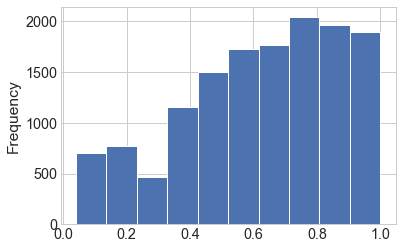

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

df_emp_master.satisfaction.plot(kind='hist')


In [31]:
# There are 150 reocrds with NULL values for Satisfaction column
# impute with mean

df_emp_master['satisfaction'] = df_emp_master['satisfaction'].replace({np.nan: getattr(df_emp_master['satisfaction'], 'mean')(),})

In [32]:
df_emp_master.satisfaction.value_counts(dropna=False)

1.000000    357
0.621212    150
0.481001    3  
0.832118    2  
0.904372    2  
           ..  
0.687016    1  
0.609661    1  
0.981732    1  
0.620342    1  
0.831547    1  
Name: satisfaction, Length: 13498, dtype: int64

In [33]:
print(df_emp_master.filed_complaint.value_counts(dropna=False))
print(df_emp_master.recently_promoted.value_counts(dropna=False))

NaN    12104
1.0    2046 
Name: filed_complaint, dtype: int64
NaN    13853
1.0    297  
Name: recently_promoted, dtype: int64


In [34]:
# Replacing null with 0
df_emp_master.filed_complaint.fillna(0, inplace=True)
df_emp_master.recently_promoted.fillna(0, inplace=True)

In [35]:
print(df_emp_master.filed_complaint.value_counts(dropna=False))
print(df_emp_master.recently_promoted.value_counts(dropna=False))

0.0    12104
1.0    2046 
Name: filed_complaint, dtype: int64
0.0    13853
1.0    297  
Name: recently_promoted, dtype: int64


In [36]:
df_emp_master[df_emp_master.employee_id == 0]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
34     284.0            D00-SS     0.0              0.852702          
304    264.0            D00-ENG    0.0              0.774554          
1234   129.0            D00-SP     0.0              0.402660          
11304  167.0            D00-OTH    0.0              0.880053          
12304  259.0            D00-ENG    0.0              0.505883          

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
34     6           0.0                low     0.069168      Left      4.0      
304    6           0.0                low     0.110974      Left      4.0      
1234   2           0.0                medium  0.437359      Left      3.0      
11304  5           0.0                low     0.682140      Employed  3.0      
12304  5           0.0                low     0.631046      Employed  4.0      

       employee_id  
34     0            
304    0            
1234   0            
11304  0            
12304  0

In [37]:
df_emp_master.shape

(14150, 11)

In [38]:
df_emp_master.loc[(df_emp_master['employee_id']!=0) & (df_emp_master['department']!=None)]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0      246.0            D00-OTH    0.0              0.866838          
1      134.0            D00-OTH    0.0              0.555718          
2      156.0            D00-SS     1.0              0.474082          
3      256.0            D00-SP     0.0              0.961360          
4      146.0            D00-SS     0.0              0.507349          
...      ...               ...     ...                   ...          
14145  245.0            D00-SS     0.0              0.850785          
14146  192.0            D00-SS     0.0              0.951901          
14147  175.0            D00-MN     0.0              0.854538          
14148  268.0            D00-MT     0.0              0.900887          
14149  268.0            D00-IT     1.0              0.897098          

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0      6           0.0                medium  0.134415      Left      4.0      
1      2           0.0                low     0.511041      Left      3.0      
2      2           0.0                medium  0.405101      Left      3.0      
3      6           0.0                low     0.152974      Left      4.0      
4      2           0.0                medium  0.434845      Left      3.0      
...   ..           ...                   ...       ...       ...      ...      
14145  6           0.0                medium  0.225084      Employed  5.0      
14146  3           0.0                medium  0.539834      Employed  3.0      
14147  4           0.0                medium  0.934465      Employed  3.0      
14148  5           0.0                medium  0.906613      Left      5.0      
14149  2           0.0                low     0.459371      Employed  4.0      

       employee_id  
0      124467       
1      112210       
2      126150       
3      125346       
4      113707       
...       ...       
14145  101809       
14146  116153       
14147  119780       
14148  115325       
14149  112312       

[14145 rows x 11 columns]

In [39]:
df_emp_master.loc[(df_emp_master['employee_id']==0) ]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
34     284.0            D00-SS     0.0              0.852702          
304    264.0            D00-ENG    0.0              0.774554          
1234   129.0            D00-SP     0.0              0.402660          
11304  167.0            D00-OTH    0.0              0.880053          
12304  259.0            D00-ENG    0.0              0.505883          

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
34     6           0.0                low     0.069168      Left      4.0      
304    6           0.0                low     0.110974      Left      4.0      
1234   2           0.0                medium  0.437359      Left      3.0      
11304  5           0.0                low     0.682140      Employed  3.0      
12304  5           0.0                low     0.631046      Employed  4.0      

       employee_id  
34     0            
304    0            
1234   0            
11304  0            
12304  0

In [40]:
# Missing values
df_emp_master.last_evaluation.fillna(0, inplace=True)

## Denormalize the Data - Merging Datasets

In [41]:
# Columns in department table and employee details dataset has different names for department id
# So column name should be renamed to join the tables

df_department=df_department.rename(columns={'dept_id':'department'})
df_department.columns

Index(['department', 'dept_name', 'dept_head'], dtype='object')

In [42]:
df_final = df_emp_master.merge(df_emp_det,on='employee_id', how='left')

In [43]:
df_final.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  246.0            D00-OTH    0.0              0.866838         6            
1  134.0            D00-OTH    0.0              0.555718         2            
2  156.0            D00-SS     1.0              0.474082         2            
3  256.0            D00-SP     0.0              0.961360         6            
4  146.0            D00-SS     0.0              0.507349         2            

   recently_promoted  salary  satisfaction status  tenure  employee_id   age  \
0  0.0                medium  0.134415      Left   4.0     124467       42.0   
1  0.0                low     0.511041      Left   3.0     112210       23.0   
2  0.0                medium  0.405101      Left   3.0     126150       24.0   
3  0.0                low     0.152974      Left   4.0     125346       51.0   
4  0.0                medium  0.434845      Left   3.0     113707       23.0   

   gender marital_status  
0  Female  Married        
1  Female  Unmarried      
2  Female  Unmarried      
3  Female  Married        
4  Female  Unmarried

In [44]:
df_final[df_final.duplicated() == False].shape

(14121, 14)

In [45]:
df_final =  df_final.merge(df_department, on='department', how='left')

In [46]:
df_final.shape

(14150, 16)

In [47]:
# Removed data with employeeid = 0
df_final.drop(df_final[df_final['employee_id'] == 0].index, inplace=True)

In [48]:
df_final.shape

(14145, 16)

In [49]:
df_final[df_final.duplicated() == True].shape

(29, 16)

In [50]:
df_final.drop_duplicates(inplace = True)

In [51]:
df_final['last_evaluation_missing']= df_final.last_evaluation.isnull().astype(int)

In [52]:
df_final.shape

(14116, 17)

In [53]:
analyze_df(df_final)

(14116, 17)
----------------------- Shape --------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14120
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_monthly_hrs          14116 non-null  float64
 1   department               14116 non-null  object 
 2   filed_complaint          14116 non-null  float64
 3   last_evaluation          14116 non-null  float64
 4   n_projects               14116 non-null  int64  
 5   recently_promoted        14116 non-null  float64
 6   salary                   14116 non-null  object 
 7   satisfaction             14116 non-null  float64
 8   status                   14116 non-null  object 
 9   tenure                   14116 non-null  float64
 10  employee_id              14116 non-null  int64  
 11  age                      14116 non-null  float64
 12  gender                   14116 non-null  ob

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  246.0            D00-OTH    0.0              0.866838         6            
1  134.0            D00-OTH    0.0              0.555718         2            
2  156.0            D00-SS     1.0              0.474082         2            
3  256.0            D00-SP     0.0              0.961360         6            
4  146.0            D00-SS     0.0              0.507349         2            

   recently_promoted  salary  satisfaction status  tenure  employee_id   age  \
0  0.0                medium  0.134415      Left   4.0     124467       42.0   
1  0.0                low     0.511041      Left   3.0     112210       23.0   
2  0.0                medium  0.405101      Left   3.0     126150       24.0   
3  0.0                low     0.152974      Left   4.0     125346       51.0   
4  0.0                medium  0.434845      Left   3.0     113707       23.0   

   gender marital_status dept_name        dept_head  last_evaluation_missing  
0  Female  Married        Others    Other            0                        
1  Female  Unmarried      Others    Other            0                        
2  Female  Unmarried      Sales     Edward J Bayley  0                        
3  Female  Married        Support   Amelia Westray   0                        
4  Female  Unmarried      Sales     Edward J Bayley  0

In [54]:
df_final.employee_id.nunique()

14116

In [55]:
df_final.employee_id.shape

(14116,)

<a id=eda></a> 
## 5. EDA - Exploratory Data Analysis

In [56]:
# Plot help functions
def ShowHBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width}', (x + width*1.02, y + height/2), va='center')

def ShowHBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width/total:.0%}', (x + width*1.02, y + height/2), va='center')
        
def ShowVBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

def ShowVBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.0%}', (x + width/2, (y + height*1.02) ), ha='center')
        
def SetPlotText(title, xlabel='', ylabel='', fontSize=20, text_direction=0, formatBarValue=True):
    
    if (formatBarValue) :
        padding = text_direction == 90 and 30 or 10
        position_index = text_direction == 90 and 2 or 3
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/position_index), p.get_height()+padding), rotation=text_direction)
    plt.xlabel(xlabel, fontsize=fontSize)
    plt.ylabel(ylabel, fontsize=fontSize)
    plt.title(title,fontsize=fontSize+5)

<a id=q1></a> 
### Q1. Number of emplyed and left count in dataset?

In [57]:
df_final.status.value_counts()

Employed    10761
Left        3355 
Name: status, dtype: int64

In [58]:
# plt.title('Employed Vs Left', fontsize=14);
# print(df_final.groupby('status').status.count().plot.pie(autopct='%1.1f%%'))

In [59]:
colors = sns.color_palette('pastel')[0:20]

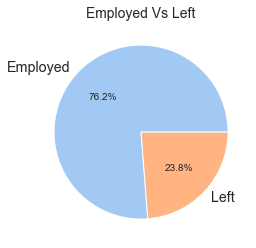

In [60]:
plt.title('Employed Vs Left', fontsize=14);
plt.pie(df_final.groupby('status').status.count(), labels=['Employed', 'Left'], colors = colors, autopct='%.1f%%')
plt.show()

<a id=q2></a> 
### Q2. Employees count at different tenures? Employed and Left employee count at different tenures?

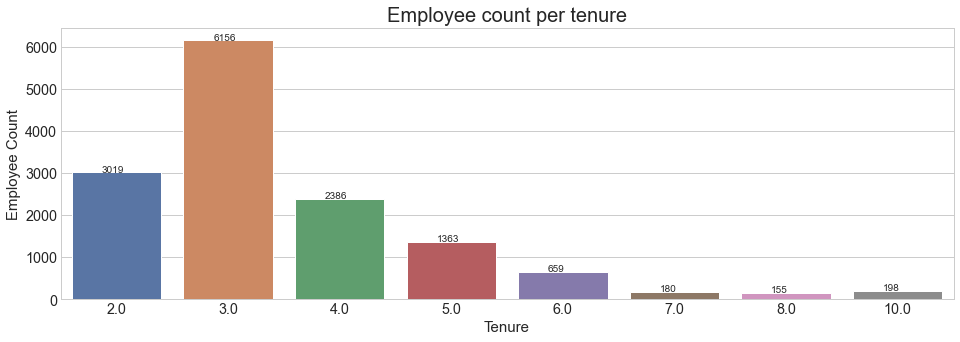

In [61]:
fig, ax = plt.subplots(figsize=(16,5))
sns.countplot(data=df_final, x='tenure')
SetPlotText("Employee count per tenure", "Tenure", "Employee Count", 15)

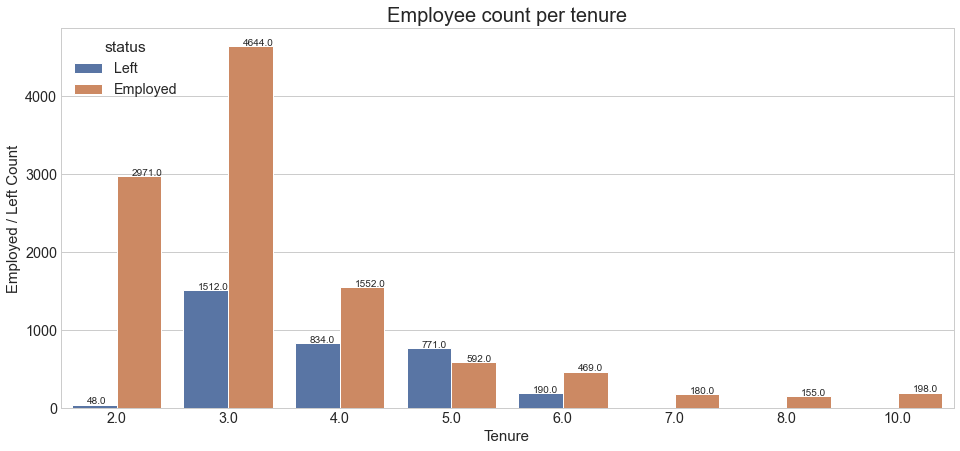

In [62]:
fig, ax = plt.subplots(figsize=(16,7))
sns.countplot(data=df_final, x='tenure', hue='status')
SetPlotText("Employee count per tenure", "Tenure", "Employed / Left Count", 15)

<a id=q3></a> 
### Q3. What is department wise Employee count? 

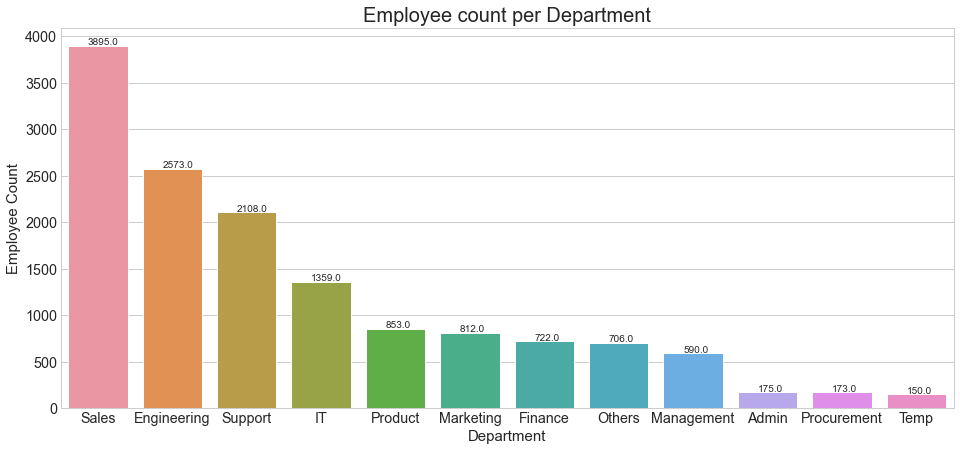

In [63]:
plotData = pd.DataFrame((df_final.groupby(['dept_name','employee_id']).employee_id.count()).groupby('dept_name').count().nlargest(20))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(data=plotData,x='dept_name', y='employee_count')
SetPlotText("Employee count per Department", "Department", "Employee Count", 15)

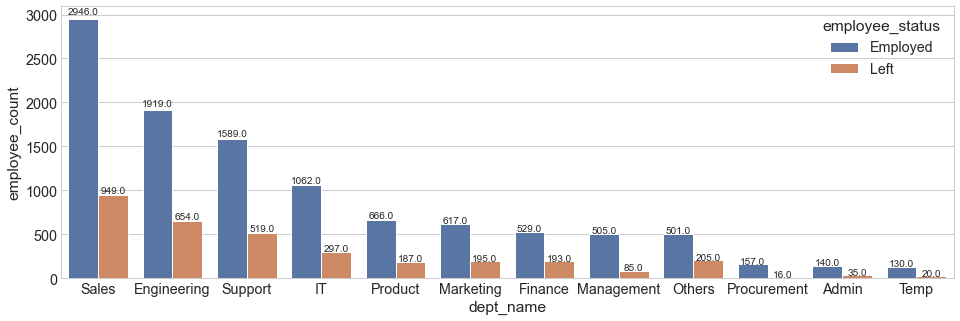

In [64]:
plotData = pd.DataFrame((df_final.groupby(['dept_name','employee_id', 'status']).employee_id.count()).groupby(['dept_name','status']).count().nlargest(30))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='dept_name', y='employee_count', hue="employee_status")
#SetPlotText("Employee count per Department", "Department", "Employee Count", 15, False)
ShowVBarValue()

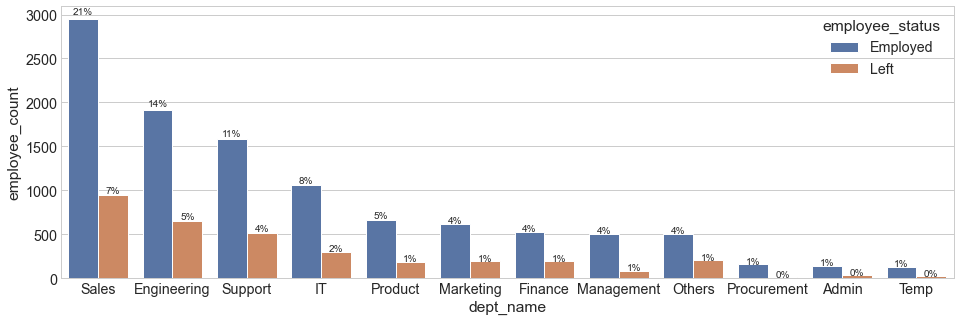

In [65]:
plotData = pd.DataFrame((df_final.groupby(['dept_name','employee_id', 'status']).employee_id.count()).groupby(['dept_name','status']).count().nlargest(30))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='dept_name', y='employee_count', hue="employee_status")
#SetPlotText("Employee count per Department", "Department", "Employee Count", 15, False)
ShowVBarPer()

<a id=q4></a> 
### Q4. What is gender wise Employee count & attrition analysis? 

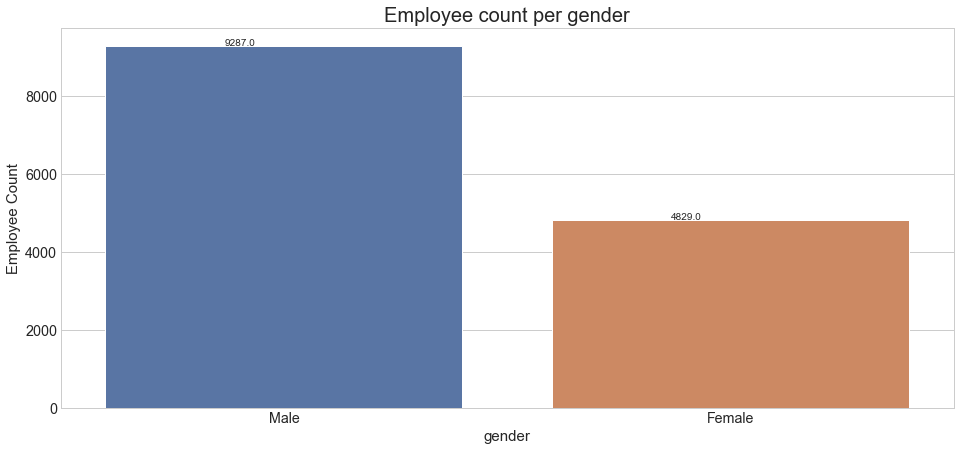

In [66]:
plotData = pd.DataFrame((df_final.groupby(['gender','employee_id']).employee_id.count()).groupby('gender').count().nlargest(20))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(data=plotData,x='gender', y='employee_count')
SetPlotText("Employee count per gender", "gender", "Employee Count", 15)

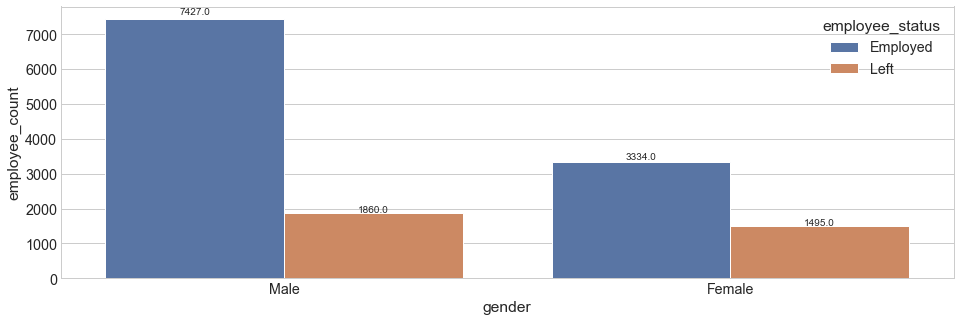

In [67]:
plotData = pd.DataFrame((df_final.groupby(['gender','employee_id', 'status']).employee_id.count()).groupby(['gender','status']).count().nlargest(30))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='gender', y='employee_count', hue="employee_status")
ShowVBarValue()

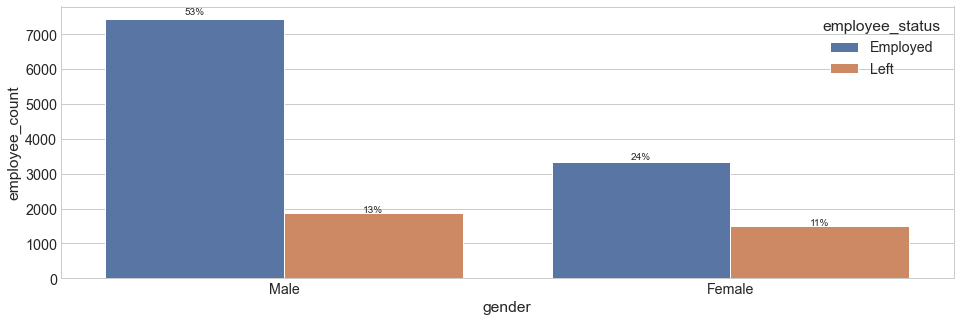

In [68]:
plotData = pd.DataFrame((df_final.groupby(['gender','employee_id', 'status']).employee_id.count()).groupby(['gender','status']).count().nlargest(30))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='gender', y='employee_count', hue="employee_status")
ShowVBarPer()

<a id=q5></a> 
### Q5. Gender & Department wise Employee count & attrition analysis? 

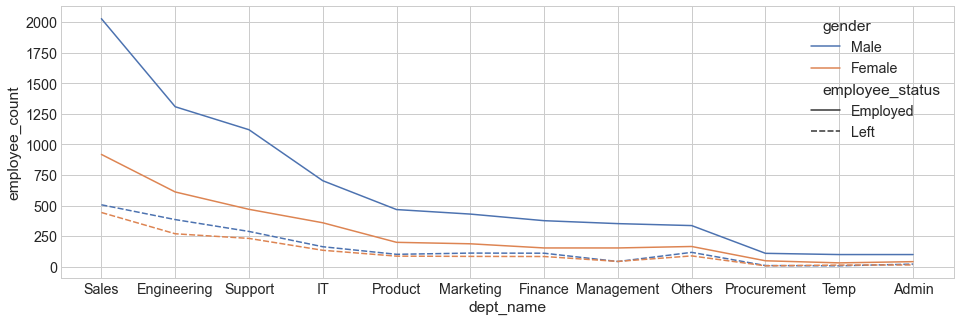

In [69]:
plotData = pd.DataFrame((df_final.groupby(['dept_name','gender', 'employee_id', 'status']).employee_id.count()).groupby(['dept_name','gender', 'status']).count().nlargest(50))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=plotData, x='dept_name', y='employee_count', hue='gender', style='employee_status')
#SetPlotText("Employee count per Department", "Department", "Employee Count", 15, False)
ShowVBarPer()

<a id=q6></a> 
### Q6. Age wise Employee count & attrition analysis? 

In [70]:
# Adding age groups
# 20-25, 25-30, 31-35 etc..

def classify_age(r):
    if r.age >= 20 and r.age <= 25:
        return '20-25'
    elif r.age >= 26 and r.age <= 30:
        return '26-30'
    elif r.age >= 31 and r.age <= 35:
        return '31-35'
    elif r.age >= 36 and r.age <= 40:
        return '36-40'
    elif r.age >= 41 and r.age <= 45:
        return '41-45'
    elif r.age >= 46 and r.age <= 50:
        return '46-50'
    elif r.age >= 51 and r.age <= 55:
        return '51-55'
    elif r.age >= 56 and r.age <= 60:
        return '56-60'
    elif r.age >= 61 and r.age <= 65:
        return '61-65'
    else:        
        return '0-100'
    

df_final["age_group"] = df_final.apply(classify_age, axis=1)

In [71]:
df_final.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  246.0            D00-OTH    0.0              0.866838         6            
1  134.0            D00-OTH    0.0              0.555718         2            
2  156.0            D00-SS     1.0              0.474082         2            
3  256.0            D00-SP     0.0              0.961360         6            
4  146.0            D00-SS     0.0              0.507349         2            

   recently_promoted  salary  satisfaction status  tenure  employee_id   age  \
0  0.0                medium  0.134415      Left   4.0     124467       42.0   
1  0.0                low     0.511041      Left   3.0     112210       23.0   
2  0.0                medium  0.405101      Left   3.0     126150       24.0   
3  0.0                low     0.152974      Left   4.0     125346       51.0   
4  0.0                medium  0.434845      Left   3.0     113707       23.0   

   gender marital_status dept_name        dept_head  last_evaluation_missing  \
0  Female  Married        Others    Other            0                         
1  Female  Unmarried      Others    Other            0                         
2  Female  Unmarried      Sales     Edward J Bayley  0                         
3  Female  Married        Support   Amelia Westray   0                         
4  Female  Unmarried      Sales     Edward J Bayley  0                         

  age_group  
0  41-45     
1  20-25     
2  20-25     
3  51-55     
4  20-25

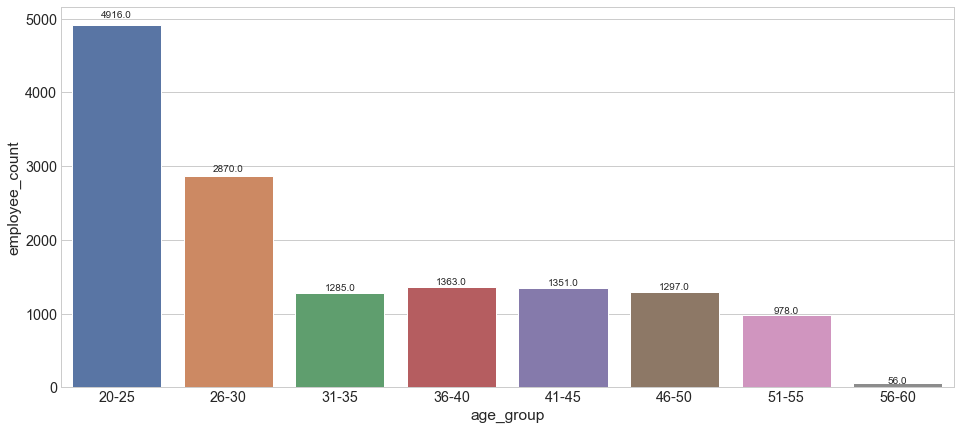

In [72]:
plotData = pd.DataFrame((df_final.groupby(['age_group','employee_id']).employee_id.count()).groupby('age_group').count())
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(data=plotData,x='age_group', y='employee_count')
ShowVBarValue()

<a id=q7></a> 
### Q7. Gender & Age wise Employee count & attrition analysis? 

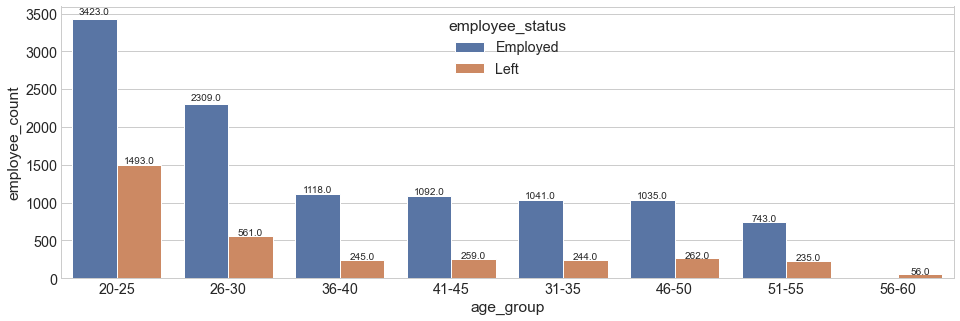

In [73]:
plotData = pd.DataFrame((df_final.groupby(['age_group','employee_id', 'status']).employee_id.count()).groupby(['age_group','status']).count().nlargest(40))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='age_group', y='employee_count', hue="employee_status")
ShowVBarValue()

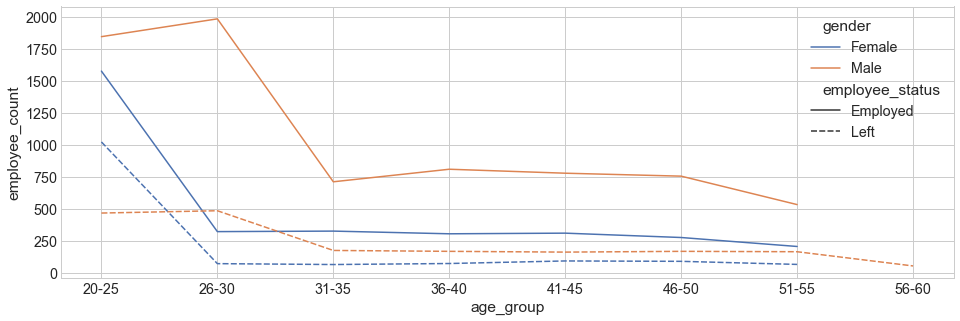

In [74]:
plotData = pd.DataFrame((df_final.groupby(['age_group','employee_id', 'gender', 'status']).employee_id.count()).groupby(['age_group', 'gender', 'status']).count())
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=plotData,x='age_group', y='employee_count', hue="gender", style='employee_status')
ShowVBarValue()

In [75]:
df_final[df_final.age_group == '56-60'].status.unique()

array(['Left'], dtype=object)

In [76]:
df_final[df_final.age >= 55].status.value_counts()

Left    94
Name: status, dtype: int64

### Insights

* Attrition is more at age from 20-30
* if the age is more than 54 yrs.. employees only left or no employees joined
* Female employees are having more percentage of attrition
* Female employees attrition rate is very high at age 20-25
* Female employees attrition rate is almost stable if the age is more than 25
* Male employees attrition is high at the age 20-25 but variance is very minimal.

<a id=q8></a> 
### Q8. Salary, Satisfaction & last evaluation impact on Employee attrition? 

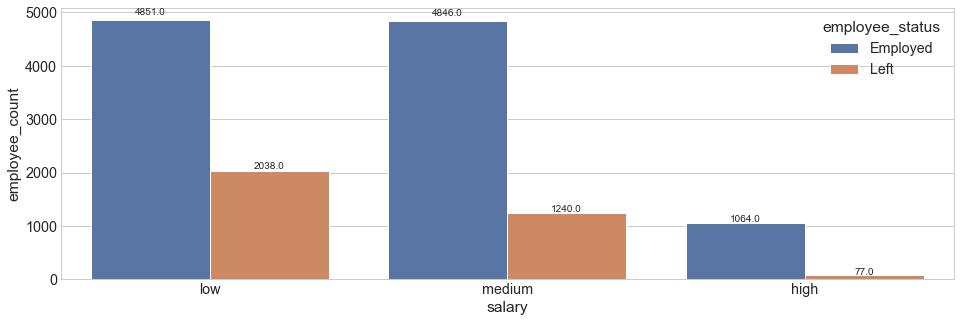

In [77]:
plotData = pd.DataFrame((df_final.groupby(['salary','employee_id', 'status']).employee_id.count()).groupby(['salary','status']).count().nlargest(40))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='salary', y='employee_count', hue="employee_status")
ShowVBarValue()

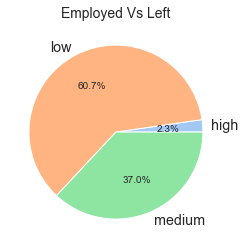

In [78]:
plt.title('Employed Vs Left', fontsize=14);
plt.pie(df_final[df_final.status == 'Left'].groupby('salary').employee_id.count(), labels=['high', 'low', 'medium'], colors = colors, autopct='%.1f%%')
plt.show()

<AxesSubplot:xlabel='satisfaction', ylabel='employee_id'>

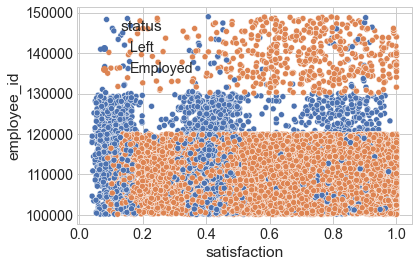

In [79]:
sns.scatterplot(data=df_final, x="satisfaction", y="employee_id", hue="status")

In [80]:
df_spl_emp = df_final[(df_final.employee_id > 120000) & (df_final.employee_id < 130000)]

In [81]:
df_spl_emp.describe()

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
count  813.000000       813.000000       813.000000       813.000000   
mean   207.655597       0.055351         0.684625         3.900369     
std    61.131204        0.228804         0.265043         1.816363     
min    63.000000        0.000000         0.000000         1.000000     
25%    146.000000       0.000000         0.511598         2.000000     
50%    227.000000       0.000000         0.782428         4.000000     
75%    261.000000       0.000000         0.906676         6.000000     
max    310.000000       1.000000         1.000000         7.000000     

       recently_promoted  satisfaction      tenure    employee_id         age  \
count  813.000000         813.000000    813.000000  813.000000     813.000000   
mean   0.003690           0.449857      3.875769    125024.391144  28.790898    
std    0.060671           0.269535      0.970280    2889.815173    9.260492     
min    0.000000           0.046094      2.000000    120002.000000  22.000000    
25%    0.000000           0.175877      3.000000    122464.000000  23.000000    
50%    0.000000           0.419416      4.000000    125031.000000  24.000000    
75%    0.000000           0.715129      5.000000    127516.000000  31.000000    
max    1.000000           0.979577      6.000000    129990.000000  54.000000    

       last_evaluation_missing  
count  813.0                    
mean   0.0                      
std    0.0                      
min    0.0                      
25%    0.0                      
50%    0.0                      
75%    0.0                      
max    0.0

In [82]:
df_spl_emp.status.value_counts()

Left    813
Name: status, dtype: int64

In [83]:
df_spl_emp.gender.value_counts()

Female    813
Name: gender, dtype: int64

In [84]:
df_spl_emp.dept_name.value_counts()

Sales          249
Engineering    141
Support        113
IT             72 
Others         58 
Finance        48 
Product        46 
Marketing      45 
Management     25 
Temp           6  
Admin          5  
Procurement    5  
Name: dept_name, dtype: int64

In [85]:
df_spl_emp.salary.value_counts()

low       484
medium    304
high      25 
Name: salary, dtype: int64

In [86]:
# Excluding these 813 employees

df_exc_emp = df_final[(df_final.employee_id < 120000) | (df_final.employee_id > 130000)]

<AxesSubplot:xlabel='satisfaction', ylabel='n_projects'>

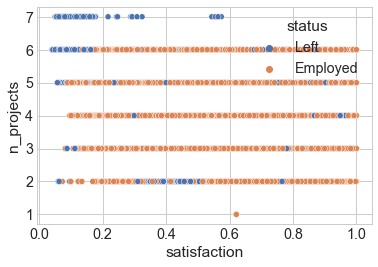

In [87]:
sns.scatterplot(data=df_exc_emp, x="satisfaction", y="n_projects", hue="status")

<AxesSubplot:xlabel='satisfaction', ylabel='n_projects'>

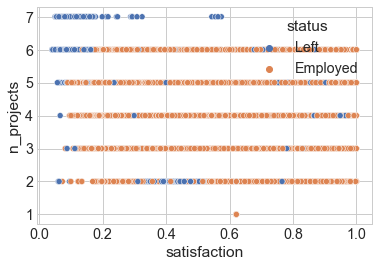

In [88]:
sns.scatterplot(data=df_final, x="satisfaction", y="n_projects", hue="status")

<AxesSubplot:xlabel='satisfaction', ylabel='last_evaluation'>

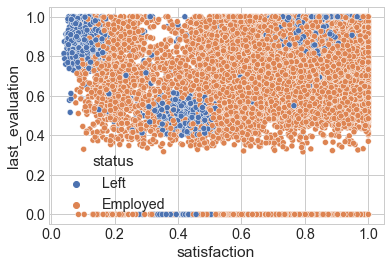

In [89]:
sns.scatterplot(data=df_final, x="satisfaction", y="last_evaluation", hue="status")

### Insights

* Employee distribution is same for low and medium salaried employees and attrition is about 60% for low salaried employees
* All employees whose employee ids are between from 120000 to 130000 
    * all are left the organisation
    * all are women
    * last evaluation was not done for these emplyees
* Employee attrition with number of projets
    * All employees who worked on 7 projects in the organisation are left.
    * Most of the employees left the organisaiton who worked on 6 projects or more with less satisfaction
    * Seems like emplyees feeling dis-satisfaction while they worked on many projects
* 

<a id=q9></a> 
### Q9. Frequency distribution of satisfaction? 

In [90]:
df_final.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  246.0            D00-OTH    0.0              0.866838         6            
1  134.0            D00-OTH    0.0              0.555718         2            
2  156.0            D00-SS     1.0              0.474082         2            
3  256.0            D00-SP     0.0              0.961360         6            
4  146.0            D00-SS     0.0              0.507349         2            

   recently_promoted  salary  satisfaction status  tenure  employee_id   age  \
0  0.0                medium  0.134415      Left   4.0     124467       42.0   
1  0.0                low     0.511041      Left   3.0     112210       23.0   
2  0.0                medium  0.405101      Left   3.0     126150       24.0   
3  0.0                low     0.152974      Left   4.0     125346       51.0   
4  0.0                medium  0.434845      Left   3.0     113707       23.0   

   gender marital_status dept_name        dept_head  last_evaluation_missing  \
0  Female  Married        Others    Other            0                         
1  Female  Unmarried      Others    Other            0                         
2  Female  Unmarried      Sales     Edward J Bayley  0                         
3  Female  Married        Support   Amelia Westray   0                         
4  Female  Unmarried      Sales     Edward J Bayley  0                         

  age_group  
0  41-45     
1  20-25     
2  20-25     
3  51-55     
4  20-25

<AxesSubplot:xlabel='satisfaction', ylabel='Count'>

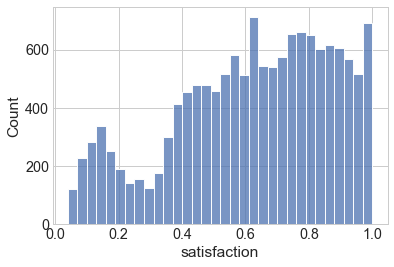

In [91]:
sns.histplot(data=df_final, x="satisfaction")

<AxesSubplot:xlabel='satisfaction', ylabel='Count'>

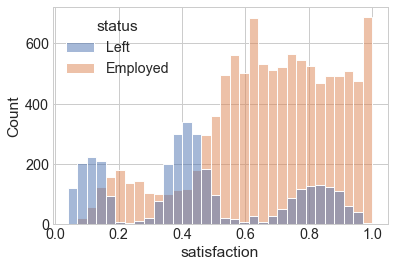

In [92]:
sns.histplot(data=df_final, x="satisfaction", hue="status")

<a id=q10></a> 
### Q10. Work hours & Number of projects influencing the attrition? 

In [93]:
df_final.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  246.0            D00-OTH    0.0              0.866838         6            
1  134.0            D00-OTH    0.0              0.555718         2            
2  156.0            D00-SS     1.0              0.474082         2            
3  256.0            D00-SP     0.0              0.961360         6            
4  146.0            D00-SS     0.0              0.507349         2            

   recently_promoted  salary  satisfaction status  tenure  employee_id   age  \
0  0.0                medium  0.134415      Left   4.0     124467       42.0   
1  0.0                low     0.511041      Left   3.0     112210       23.0   
2  0.0                medium  0.405101      Left   3.0     126150       24.0   
3  0.0                low     0.152974      Left   4.0     125346       51.0   
4  0.0                medium  0.434845      Left   3.0     113707       23.0   

   gender marital_status dept_name        dept_head  last_evaluation_missing  \
0  Female  Married        Others    Other            0                         
1  Female  Unmarried      Others    Other            0                         
2  Female  Unmarried      Sales     Edward J Bayley  0                         
3  Female  Married        Support   Amelia Westray   0                         
4  Female  Unmarried      Sales     Edward J Bayley  0                         

  age_group  
0  41-45     
1  20-25     
2  20-25     
3  51-55     
4  20-25

<AxesSubplot:xlabel='avg_monthly_hrs', ylabel='employee_id'>

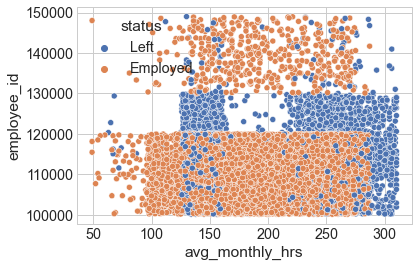

In [94]:
sns.scatterplot(data=df_final, x="avg_monthly_hrs", y='employee_id', hue='status')

<AxesSubplot:xlabel='n_projects', ylabel='employee_id'>

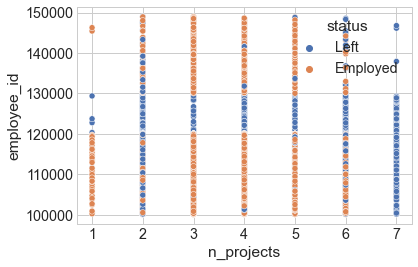

In [95]:
sns.scatterplot(data=df_final, x="n_projects", y='employee_id', hue='status')

<AxesSubplot:xlabel='avg_monthly_hrs', ylabel='n_projects'>

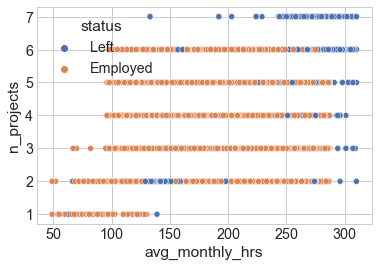

In [96]:
sns.scatterplot(data=df_final, x="avg_monthly_hrs", y='n_projects', hue='status')

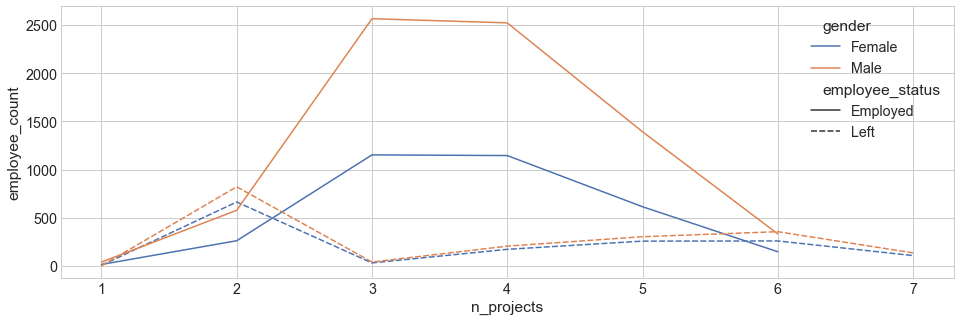

In [97]:
plotData = pd.DataFrame((df_final.groupby(['n_projects','employee_id','gender', 'status']).employee_id.count()).groupby(['n_projects', 'gender', 'status']).count())
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=plotData,x='n_projects', y='employee_count', hue="gender", style='employee_status')
ShowVBarValue()

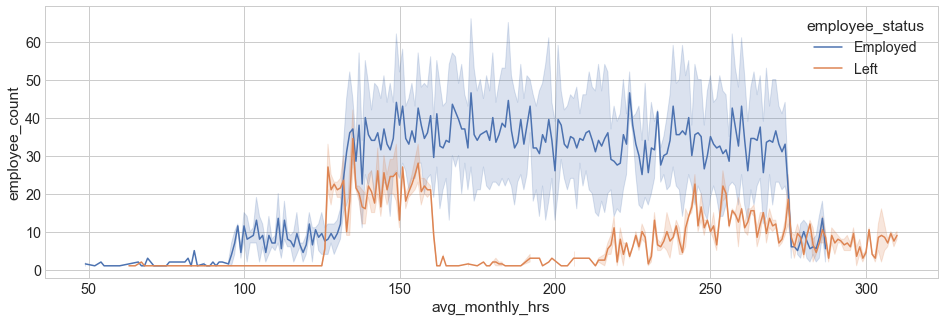

In [98]:
plotData = pd.DataFrame((df_final.groupby(['avg_monthly_hrs','employee_id','gender', 'status']).employee_id.count()).groupby(['avg_monthly_hrs', 'gender', 'status']).count())
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=plotData,x='avg_monthly_hrs', y='employee_count', hue="employee_status")
ShowVBarValue()

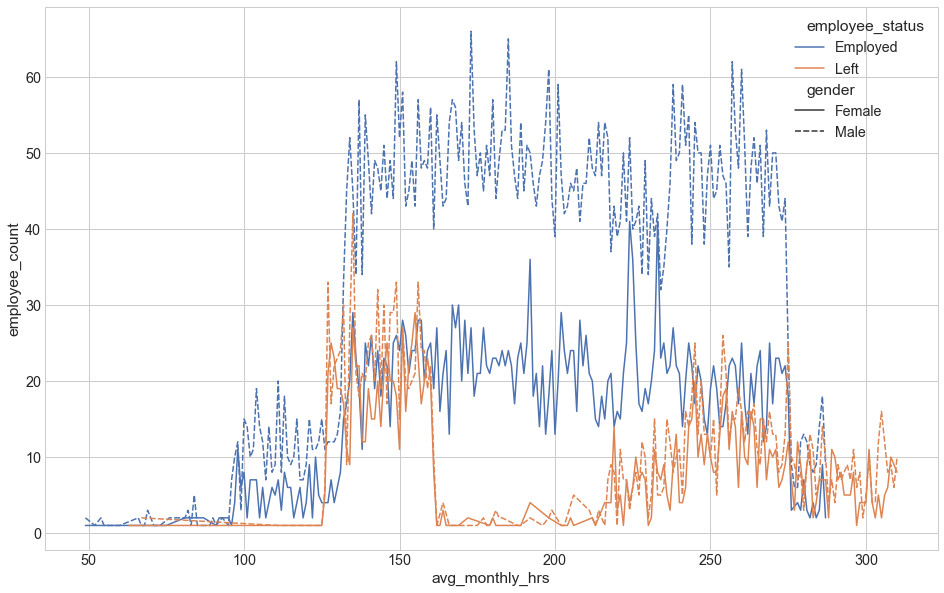

In [99]:
plotData = pd.DataFrame((df_final.groupby(['avg_monthly_hrs','employee_id','gender', 'status']).employee_id.count()).groupby(['avg_monthly_hrs', 'gender', 'status']).count())
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=plotData,x='avg_monthly_hrs', y='employee_count', hue="employee_status", style='gender')
ShowVBarValue()

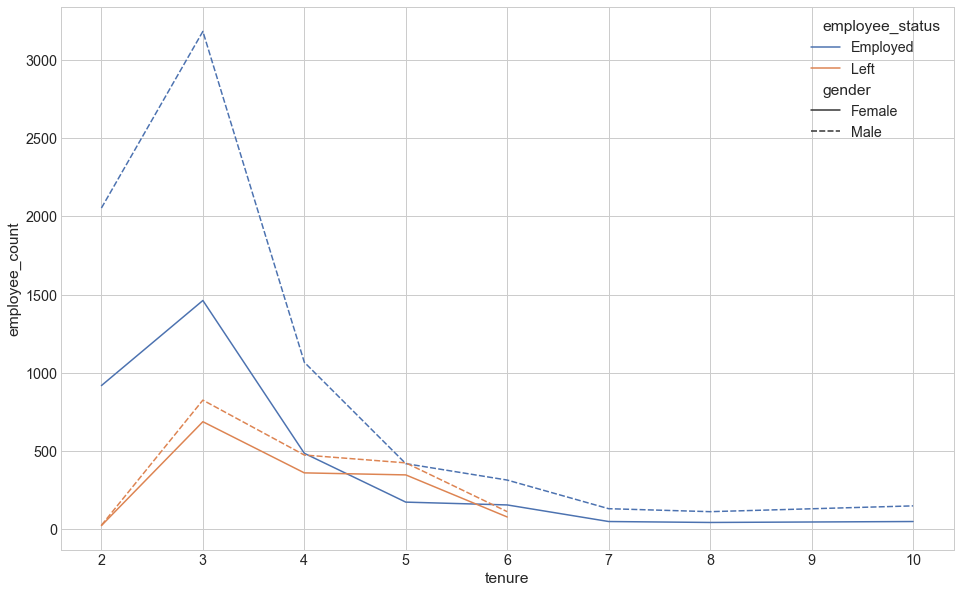

In [100]:
plotData = pd.DataFrame((df_final.groupby(['tenure','employee_id','gender', 'status']).employee_id.count()).groupby(['tenure', 'gender', 'status']).count())
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=plotData,x='tenure', y='employee_count', hue="employee_status", style='gender')
ShowVBarValue()

<AxesSubplot:xlabel='tenure', ylabel='status'>

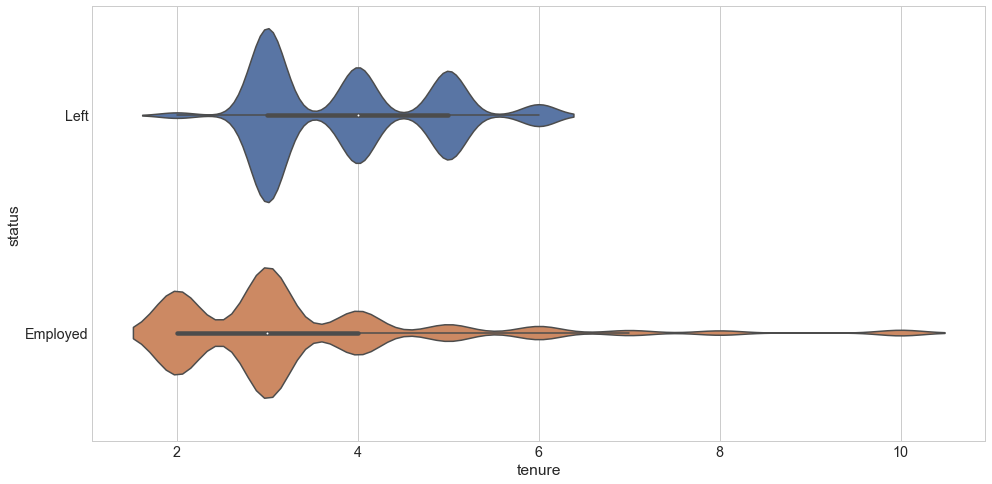

In [101]:
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=df_final, y='status', x='tenure')

### Insights:

* Most of the employees left the organisation after 3-5 years of tenure and reported high attrition post 3 years.
* After spending 6 years in the organisation, employees are not preferring to move out.
* more number of male employees are working 3 or more projects at a time
* employees who has more work load is more likely to leave the organisation.

<a id=q11></a> 
### Q11. Other observations

<AxesSubplot:xlabel='last_evaluation', ylabel='status'>

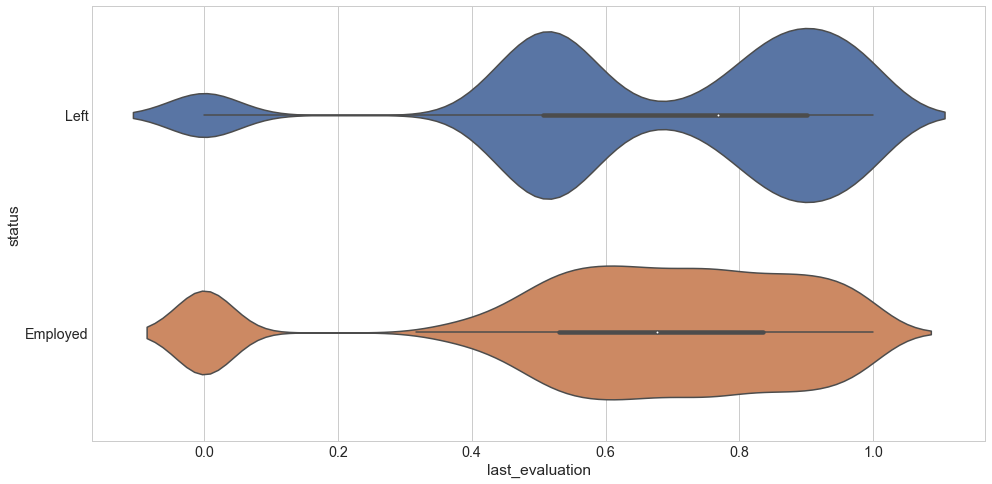

In [102]:
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=df_final, x='last_evaluation', y='status')

<AxesSubplot:xlabel='satisfaction', ylabel='status'>

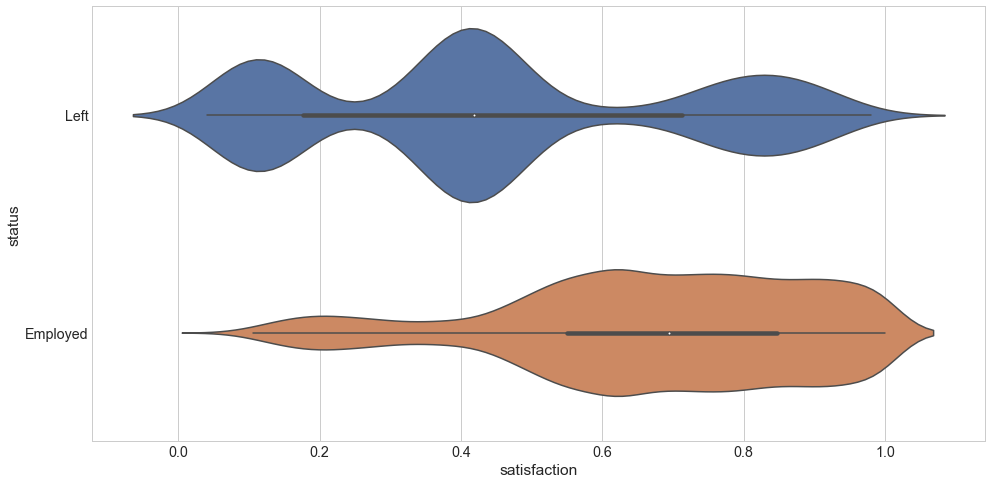

In [103]:
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=df_final, x='satisfaction', y='status')

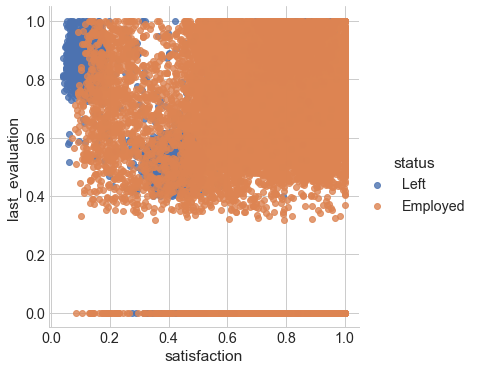

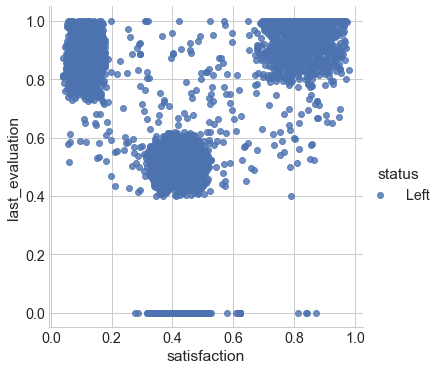

In [104]:
sns.lmplot(data=df_final, x='satisfaction', y='last_evaluation', hue='status', fit_reg=False)
sns.lmplot(data=df_final[df_final.status=='Left'], x='satisfaction', y='last_evaluation', hue='status', fit_reg=False)

## OBS-1

`Underperformers : last_evaluation < 0.6
Despodent       : satisfaction_level < 0.2
Prodigies       : last_evaluation > 0.8 and satisfaction > 0.7
`

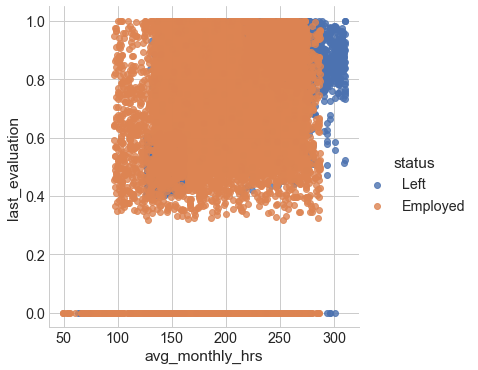

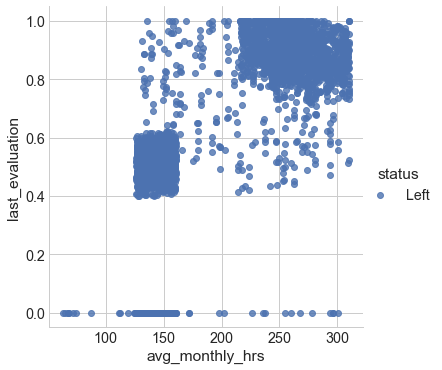

In [105]:
sns.lmplot(data=df_final, x='avg_monthly_hrs', y='last_evaluation', hue='status', fit_reg=False)
sns.lmplot(data=df_final[df_final.status=='Left'], x='avg_monthly_hrs', y='last_evaluation', hue='status', fit_reg=False)


## OBS-2
`
TopPerformers : avg_monthly_hrs > 215 and last_evaluation > 0.75
Slackers      : avg_monthly_hrs < 165 and last_evaluation < 0.65
`

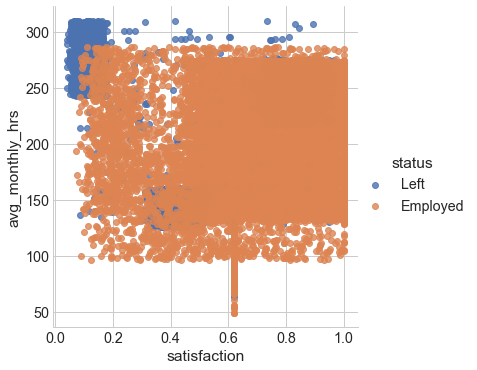

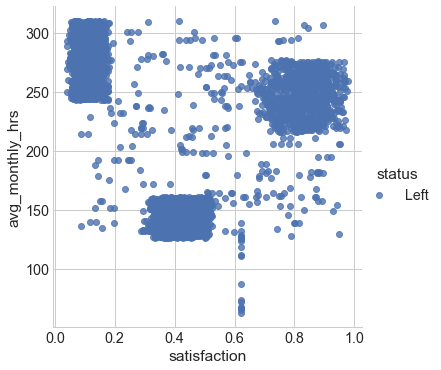

In [106]:
sns.lmplot(data=df_final, x='satisfaction', y='avg_monthly_hrs', hue='status', fit_reg=False)
sns.lmplot(data=df_final[df_final.status=='Left'], x='satisfaction', y='avg_monthly_hrs', hue='status', fit_reg=False)

## OBS-3
`
Factotum   : avg_monthly_hrs > 210 and satisfation > 0.7
Justajob   : avg_monthly_hrs < 170
Industrious: avg_monthly_hrs > 225 and satisfaction < 0.2
`

### Insights:

* though the employees scored better in the previous review (last evaluation), due to poor satisafaction levels employees prefered to leave the organisation




<a id=featureengineering></a> 
# 6. Feature Engineering

### Correlation among the features

In [107]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

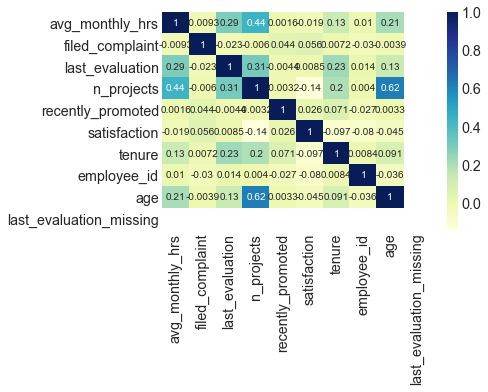

In [108]:
sns.heatmap(df_final.corr(), annot=True, cmap="YlGnBu")
plt.show()

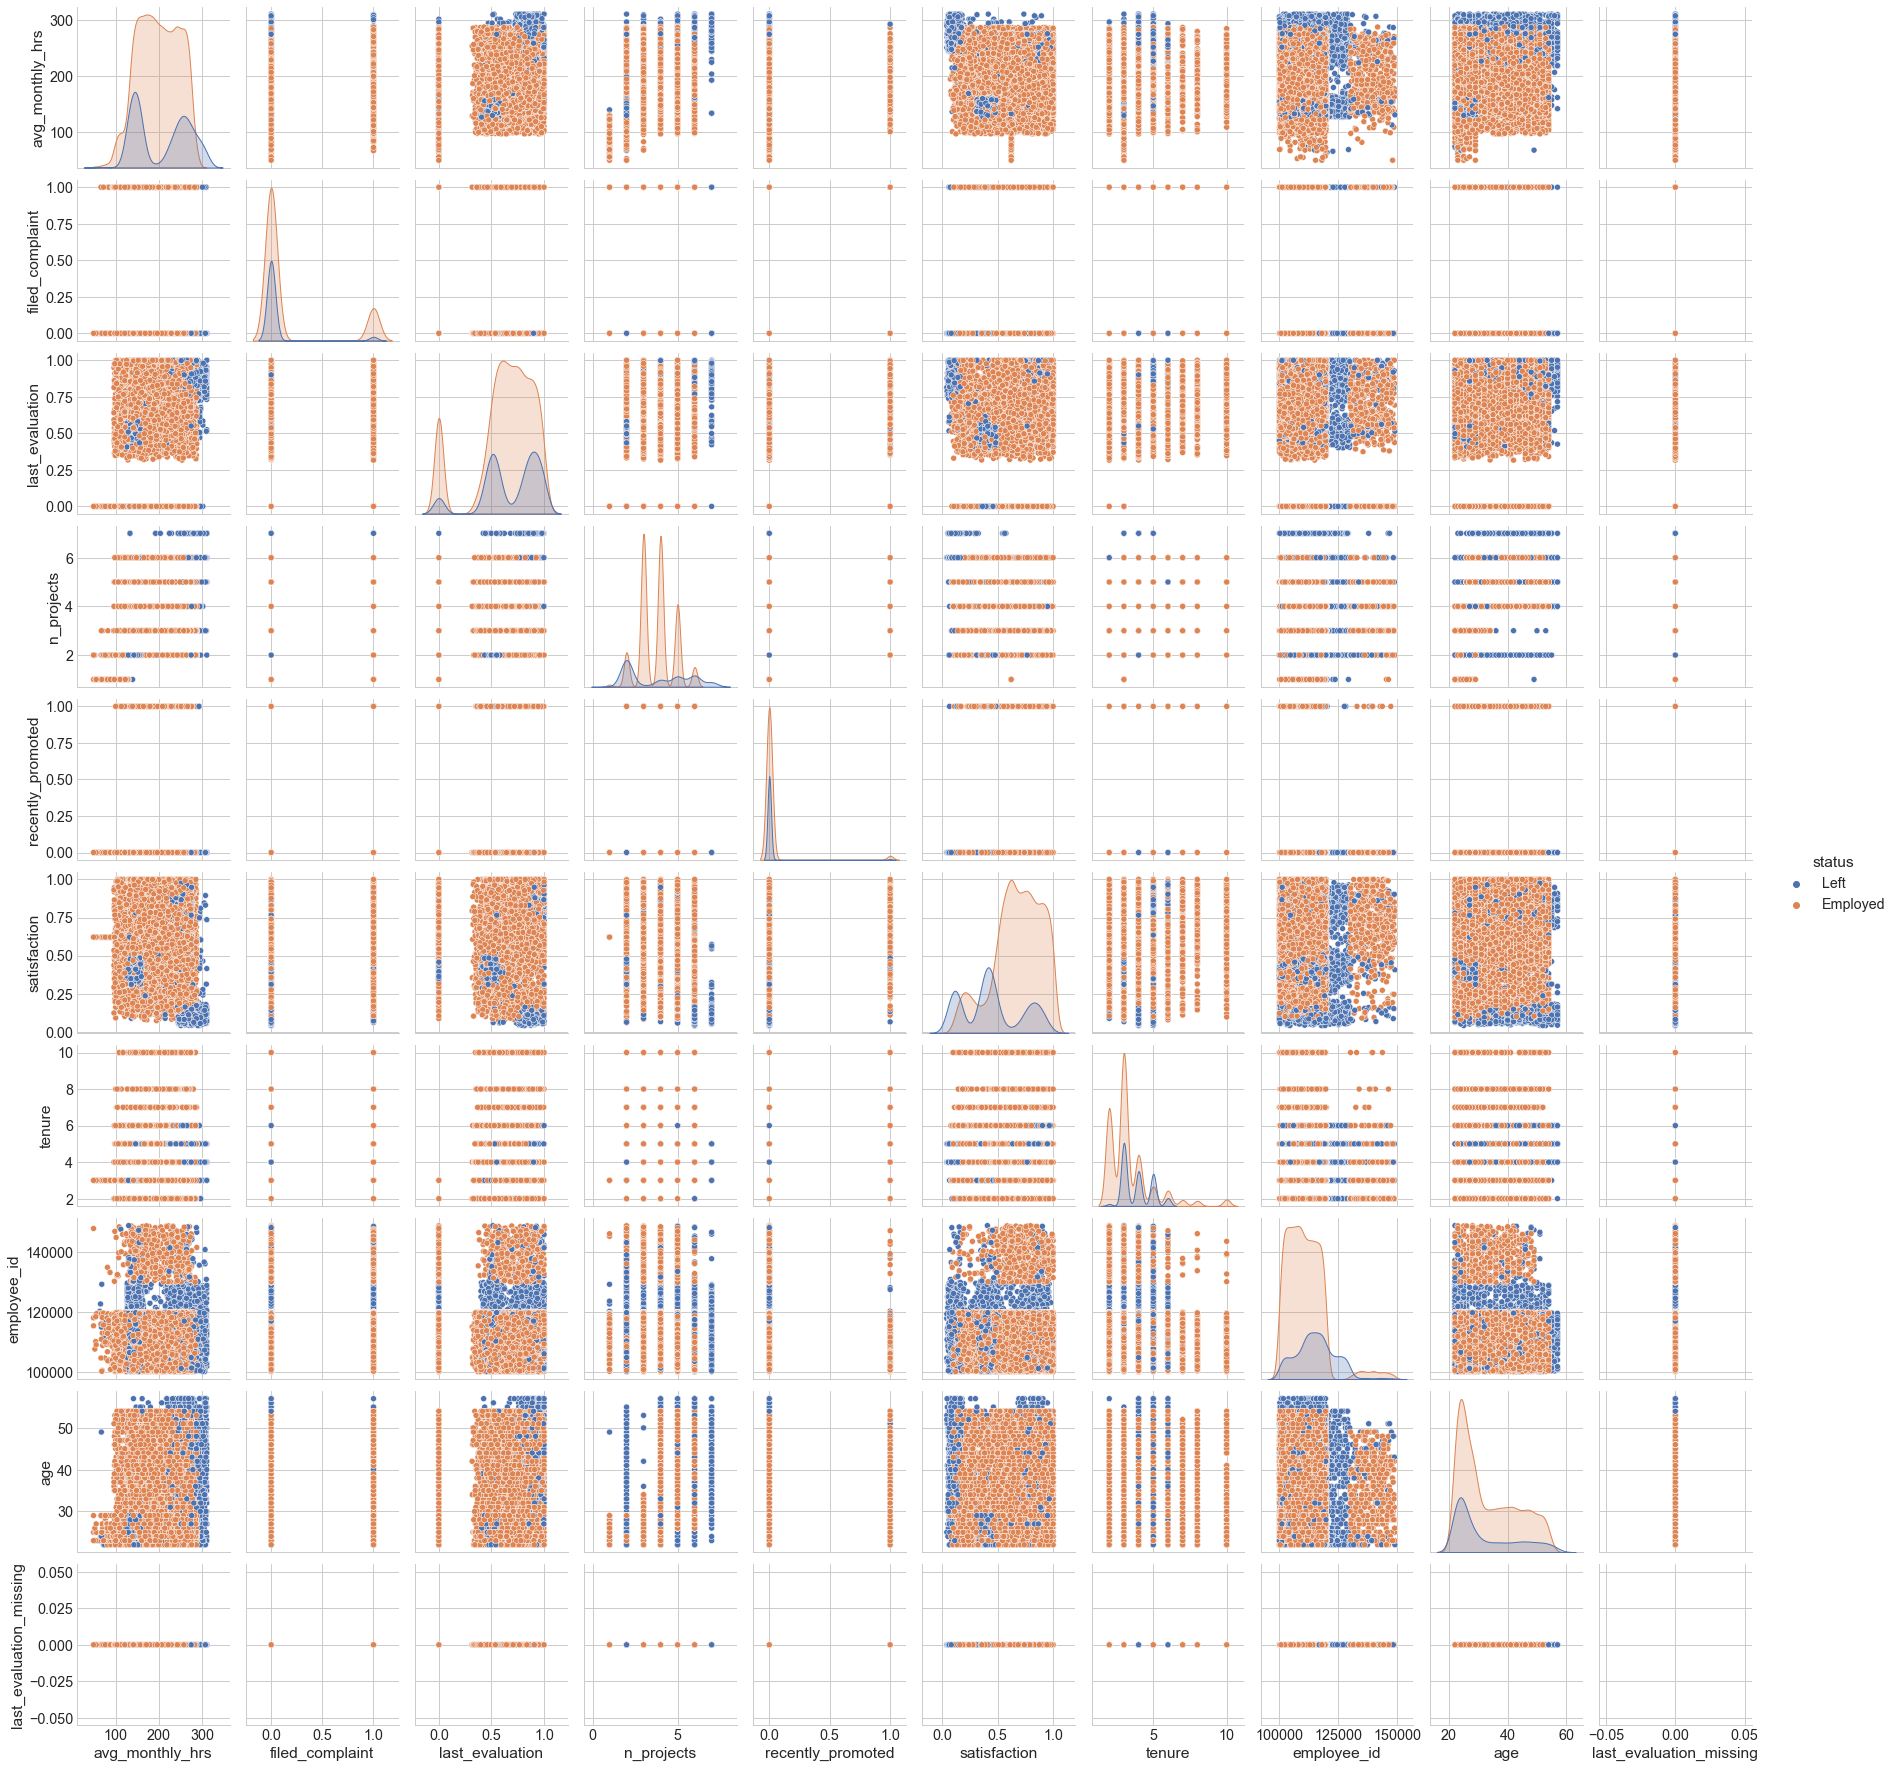

In [109]:
sns.pairplot(data=df_final, hue='status')


In [110]:
df_final.corr()

avg_monthly_hrs  filed_complaint  last_evaluation  \
avg_monthly_hrs          1.000000        -0.009322         0.288973          
filed_complaint         -0.009322         1.000000        -0.022516          
last_evaluation          0.288973        -0.022516         1.000000          
n_projects               0.439014        -0.006033         0.313052          
recently_promoted        0.001633         0.043591        -0.004403          
satisfaction            -0.019098         0.056443         0.008452          
tenure                   0.129413         0.007202         0.226226          
employee_id              0.010069        -0.030404         0.013689          
age                      0.206099        -0.003933         0.134895          
last_evaluation_missing NaN              NaN              NaN                

                         n_projects  recently_promoted  satisfaction  \
avg_monthly_hrs          0.439014    0.001633          -0.019098       
filed_complaint         -0.006033    0.043591           0.056443       
last_evaluation          0.313052   -0.004403           0.008452       
n_projects               1.000000   -0.003159          -0.141034       
recently_promoted       -0.003159    1.000000           0.025802       
satisfaction            -0.141034    0.025802           1.000000       
tenure                   0.196403    0.071232          -0.097326       
employee_id              0.003978   -0.026640          -0.080147       
age                      0.624943    0.003310          -0.045330       
last_evaluation_missing NaN         NaN                NaN             

                           tenure  employee_id       age  \
avg_monthly_hrs          0.129413  0.010069     0.206099   
filed_complaint          0.007202 -0.030404    -0.003933   
last_evaluation          0.226226  0.013689     0.134895   
n_projects               0.196403  0.003978     0.624943   
recently_promoted        0.071232 -0.026640     0.003310   
satisfaction            -0.097326 -0.080147    -0.045330   
tenure                   1.000000  0.008372     0.090586   
employee_id              0.008372  1.000000    -0.036190   
age                      0.090586 -0.036190     1.000000   
last_evaluation_missing NaN       NaN          NaN         

                         last_evaluation_missing  
avg_monthly_hrs         NaN                       
filed_complaint         NaN                       
last_evaluation         NaN                       
n_projects              NaN                       
recently_promoted       NaN                       
satisfaction            NaN                       
tenure                  NaN                       
employee_id             NaN                       
age                     NaN                       
last_evaluation_missing NaN

### From observations 1,2 and 3, feature engineer these 8 clusters of employees

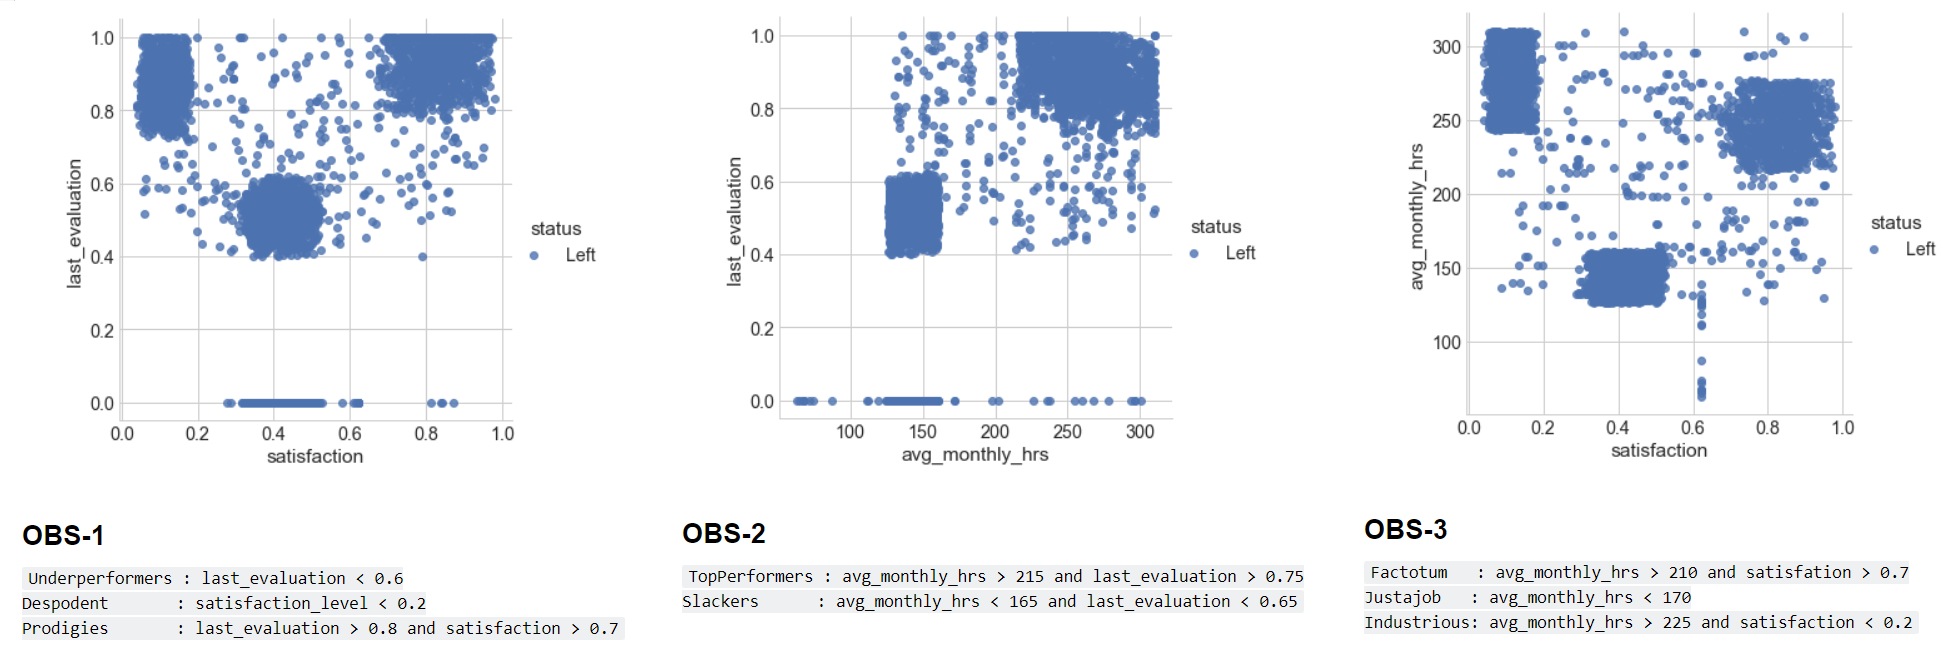

In [111]:
df_final.shape

(14116, 18)

In [112]:
def addFeaturesBasedOnClusters(df_input):
    df_input['underperformer'] = ((df_input.last_evaluation < 0.6) & (df_input.last_evaluation_missing==0)).astype(int)
    df_input['despodent'] = (df_input.satisfaction < 0.2).astype(int)
    df_input['prodigy'] = ((df_input.last_evaluation > 0.8) & (df_input.satisfaction > 0.7)).astype(int)
    df_input['topperformer'] = ((df_input.avg_monthly_hrs > 215) & (df_input.last_evaluation > 0.75)).astype(int)
    df_input['slacker'] = ((df_input.avg_monthly_hrs < 165) & (df_input.last_evaluation < 0.65) & (df_input.last_evaluation_missing==0)).astype(int)
    df_input['factotum'] = ((df_input.avg_monthly_hrs > 210) & (df_input.satisfaction > 0.7)).astype(int)
    df_input['justajob'] = (df_input.avg_monthly_hrs < 170).astype(int)
    df_input['industrious'] = ((df_input.avg_monthly_hrs > 225) & (df_input.satisfaction < 0.2)).astype(int)

In [113]:
addFeaturesBasedOnClusters(df_final)

In [114]:
df_final.shape

(14116, 26)

In [115]:
new_cluster_cols = ['underperformer', 'despodent', 'prodigy', 'topperformer', 'slacker', 'factotum', 'justajob', 'industrious']
df_final[new_cluster_cols].mean()

underperformer    0.387929
despodent         0.091102
prodigy           0.174908
topperformer      0.238878
slacker           0.212454
factotum          0.224072
justajob          0.346061
industrious       0.070771
dtype: float64

<AxesSubplot:xlabel='index', ylabel='mean'>

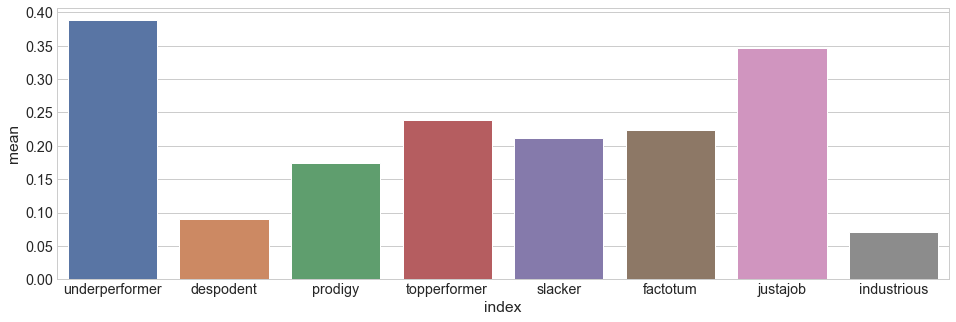

In [116]:
featureColMean = pd.DataFrame(df_final[new_cluster_cols].mean())
featureColMean.reset_index(inplace=True)
featureColMean.rename(columns={0:'mean'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=featureColMean, x='index', y='mean')

### Observations:

* about 38.8% of employees are under performing
* about 9% of employees are un-happy
* about 34.6% of employees are just job (meets expectations)
* about 7% of employees are very hard working

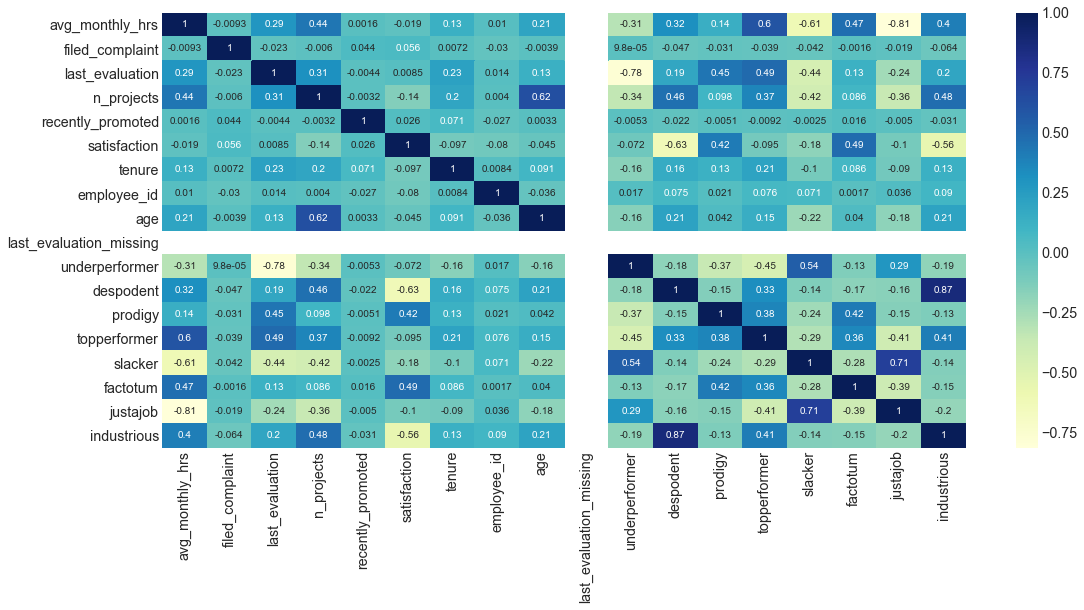

In [117]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(df_final.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Encoding categorical values and removing unwanted features

* Label Encoding - `department` & `age_group`
* OHE - `salary`, `gender` & `marital_status`
* Unwanted features to be removed - `department,salary,employee_id,age,gender,marital_status,dept_name,dept_head, age_group`

In [118]:
# packages for importing the packages

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()


In [119]:
encoding_col_le = ['department','age_group']
encoding_col_OHE = ['salary', 'gender', 'marital_status']
other_unused_features = ['employee_id','age', 'dept_name', 'dept_head']
unused_features_removed = encoding_col_le + other_unused_features

In [120]:
df_final['dept'] = le.fit_transform(df_final['department'])
df_final['agegroup'] = le.fit_transform(df_final['age_group'])

In [121]:
df_final = pd.get_dummies(df_final, prefix=encoding_col_OHE, columns=encoding_col_OHE, drop_first=True )

In [122]:
df_final.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  246.0            D00-OTH    0.0              0.866838         6            
1  134.0            D00-OTH    0.0              0.555718         2            
2  156.0            D00-SS     1.0              0.474082         2            
3  256.0            D00-SP     0.0              0.961360         6            
4  146.0            D00-SS     0.0              0.507349         2            

   recently_promoted  satisfaction status  tenure  employee_id   age  \
0  0.0                0.134415      Left   4.0     124467       42.0   
1  0.0                0.511041      Left   3.0     112210       23.0   
2  0.0                0.405101      Left   3.0     126150       24.0   
3  0.0                0.152974      Left   4.0     125346       51.0   
4  0.0                0.434845      Left   3.0     113707       23.0   

  dept_name        dept_head  last_evaluation_missing age_group  \
0  Others    Other            0                        41-45      
1  Others    Other            0                        20-25      
2  Sales     Edward J Bayley  0                        20-25      
3  Support   Amelia Westray   0                        51-55      
4  Sales     Edward J Bayley  0                        20-25      

   underperformer  despodent  prodigy  topperformer  slacker  factotum  \
0  0               1          0        1             0        0          
1  1               0          0        0             1        0          
2  1               0          0        0             1        0          
3  0               1          0        1             0        0          
4  1               0          0        0             1        0          

   justajob  industrious  dept  agegroup  salary_low  salary_medium  \
0  0         1            6     4         0           1               
1  1         0            6     0         1           0               
2  1         0            10    0         0           1               
3  0         1            9     6         1           0               
4  1         0            10    0         0           1               

   gender_Male  marital_status_Unmarried  
0  0            0                         
1  0            1                         
2  0            1                         
3  0            0                         
4  0            1

### Clone the dataset and drop unwanted columns

In [123]:
df_master = df_final

In [124]:
df_master.shape

(14116, 29)

In [125]:
df_master.drop(unused_features_removed, axis=1, inplace=True)

In [126]:
df_master.shape

(14116, 23)

In [127]:
df_final.head(2)

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0  246.0            0.0              0.866838         6            
1  134.0            0.0              0.555718         2            

   recently_promoted  satisfaction status  tenure  last_evaluation_missing  \
0  0.0                0.134415      Left   4.0     0                         
1  0.0                0.511041      Left   3.0     0                         

   underperformer  despodent  prodigy  topperformer  slacker  factotum  \
0  0               1          0        1             0        0          
1  1               0          0        0             1        0          

   justajob  industrious  dept  agegroup  salary_low  salary_medium  \
0  0         1            6     4         0           1               
1  1         0            6     0         1           0               

   gender_Male  marital_status_Unmarried  
0  0            0                         
1  0            1

<a id=modelcreation></a> 
# 7. Machine Learning Models

#### Lets use following classification techniques for Employee churn dataset
* Logistic Regression (L1 regularisation)
* Logistic Regression (L2 regularisation)
* Random Forest
* Gradient Boost 
* SVM
* KNN
* Naive Bayes

In [128]:
df_master.head()

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0  246.0            0.0              0.866838         6            
1  134.0            0.0              0.555718         2            
2  156.0            1.0              0.474082         2            
3  256.0            0.0              0.961360         6            
4  146.0            0.0              0.507349         2            

   recently_promoted  satisfaction status  tenure  last_evaluation_missing  \
0  0.0                0.134415      Left   4.0     0                         
1  0.0                0.511041      Left   3.0     0                         
2  0.0                0.405101      Left   3.0     0                         
3  0.0                0.152974      Left   4.0     0                         
4  0.0                0.434845      Left   3.0     0                         

   underperformer  despodent  prodigy  topperformer  slacker  factotum  \
0  0               1          0        1             0        0          
1  1               0          0        0             1        0          
2  1               0          0        0             1        0          
3  0               1          0        1             0        0          
4  1               0          0        0             1        0          

   justajob  industrious  dept  agegroup  salary_low  salary_medium  \
0  0         1            6     4         0           1               
1  1         0            6     0         1           0               
2  1         0            10    0         0           1               
3  0         1            9     6         1           0               
4  1         0            10    0         0           1               

   gender_Male  marital_status_Unmarried  
0  0            0                         
1  0            1                         
2  0            1                         
3  0            0                         
4  0            1

In [129]:
# Imports for model creation

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [130]:
# Set independent and target variables

y = df_master.status
X = df_master.drop('status', axis=1)

In [131]:
X.head()
print(X.shape)

(14116, 22)


In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor                  features
0   48.938415   avg_monthly_hrs         
1   1.185776    filed_complaint         
2   17.684130   last_evaluation         
3   29.444479   n_projects              
4   1.040261    recently_promoted       
5   16.792975   satisfaction            
6   7.448983    tenure                  
7  NaN          last_evaluation_missing 
8   4.687974    underperformer          
9   5.525366    despodent               
10  2.261709    prodigy                 
11  3.189750    topperformer            
12  3.926388    slacker                 
13  2.597707    factotum                
14  5.074774    justajob                
15  5.191048    industrious             
16  3.784924    dept                    
17  6.178325    agegroup                
18  6.824393    salary_low              
19  6.106027    salary_medium           
20  3.046302    gender_Male             
21  7.731899    marital_status_Unmarried

In [133]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(X.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # create a column of variable names
    vif["Features"] = X.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        X = X.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                  Features
0   1.176192    filed_complaint         
1   1.038514    recently_promoted       
2   6.083458    tenure                  
3  NaN          last_evaluation_missing 
4   2.953875    underperformer          
5   4.736775    despodent               
6   1.877428    prodigy                 
7   2.722265    topperformer            
8   3.701823    slacker                 
9   2.054860    factotum                
10  3.918730    justajob                
11  4.987961    industrious             
12  3.619269    dept                    
13  4.903167    agegroup                
14  5.098413    salary_low              
15  4.610283    salary_medium           
16  2.986136    gender_Male             
17  5.065143    marital_status_Unmarried


#### Lets use 'Statified Sampling' as our dataset is slightly imbalanced.

In [134]:
# !pip install imbalanced-learn

In [135]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [136]:
# Summarize original class distribution
print(Counter(y))

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# Summarize original class distribution

print(Counter(y))

Counter({'Employed': 10761, 'Left': 3355})
Counter({'Left': 10761, 'Employed': 10761})


In [141]:
X.shape

(21522, 18)

In [142]:
y.shape

(21522,)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

#### Define a pipeline object to train the model. make_pipeline is a function which takes sequence of steps need to be excuted for creating any model. It makes model creation steps easier and well organised.

In [144]:
model_pipelines = {
    'REG_L1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear', random_state=111)),
    'REG_L2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=111)),
    'RF'    : make_pipeline(RandomForestClassifier(random_state=111)),
    'GB'    : make_pipeline(GradientBoostingClassifier(random_state=111))
}

#### Hyper parameter tuning

* for logistic regression, `strength of regulation of C` is most impactful 
* for random forest, `number of estimators(n_estimators)`, `max number of features to consider during split (max_features)` and `minimum number of samples to be a leaf (min_samples_leaf)` are the key parameters 
* for gradient boost, `number of estimators(n_estimators)`, `learning rate` and `maximum depth of the tree(max_depth)` makes significant impact in hyper-parameter tuning

In [145]:
# Logistic Regression 
l1_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
l2_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

# Random forest
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
    }

# Gradient Boost
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
    }

In [146]:
# Hyper parameters collection

hyperparameters = {
    'REG_L1': l1_hyperparameters,
    'REG_L2': l2_hyperparameters,
    'RF'    : rf_hyperparameters,
    'GB'    : gb_hyperparameters
}

In [148]:
# Train the models with cross validation  with declared hyper parameters using GridSearchCV

'''

cv : int, cross-validation generator or an iterable, default=None
    Determines the cross-validation splitting strategy.
    Possible inputs for cv are:

    - None, to use the default 5-fold cross validation,
    - integer, to specify the number of folds in a `(Stratified)KFold`,
    - :term:`CV splitter`,
    - An iterable yielding (train, test) splits as arrays of indices.

    For integer/None inputs, if the estimator is a classifier and ``y`` is
    either binary or multiclass, :class:`StratifiedKFold` is used. In all
    other cases, :class:`KFold` is used.

    
n_jobs : int, default=None
    Number of jobs to run in parallel.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors.    
    
'''
from datetime import datetime

models_fitted_train_data = {}
for name, pipeline in model_pipelines.items():
    dt_string = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    print(name, "Start", dt_string )
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    models_fitted_train_data[name] = model
    dt_string = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    print(name, "End", dt_string )


REG_L1 Start 24/11/2021 11:01:31
REG_L1 End 24/11/2021 11:01:42
REG_L2 Start 24/11/2021 11:01:42
REG_L2 End 24/11/2021 11:01:51
RF Start 24/11/2021 11:01:51
RF End 24/11/2021 11:05:41
GB Start 24/11/2021 11:05:41
GB End 24/11/2021 11:09:06


<a id=modelevaluation></a> 
# 8. Model Evaluation

In [149]:
# Import packages for model evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

In [150]:
# Model best scores

for name, model in models_fitted_train_data.items():
    print(name, model.best_score_)

REG_L1 0.8640725693525306
REG_L2 0.8641345272211799
RF 0.9447364968292149
GB 0.9460381108029203


### model performance, confusion metrics, F1 score, AUC

In [243]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
sns.set_palette("muted")
    

def calc_f1(p_and_r):
    p, r = p_and_r
    return (2*p*r)/(p+r)

def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
    
# Print the F1, Precision, Recall, ROC-AUC, and Accuracy Metrics 
# Since we are optimizing for F1 score - we will first calculate precision and recall and 
# then find the probability threshold value that gives us the best F1 score

def print_model_metrics(y_test, y_test_prob, confusion = False, verbose = True, return_metrics = False, threshold_value=0):

    POS_LBL = 'Left'
    precision, recall, threshold = precision_recall_curve(y_test, y_test_prob, pos_label = POS_LBL)
    best_index = 0
    
    #Find the threshold value that gives the best F1 Score
    if threshold_value == 0: 
        best_index =np.argmax([calc_f1(p_r) for p_r in zip(precision, recall)])
    else:
        best_index = find_nearest_index(threshold, threshold_value)
        
    best_threshold, best_precision, best_recall = threshold[best_index], precision[best_index], recall[best_index]
    
    # Calulcate predictions based on the threshold value
    y_test_pred = np.where(y_test_prob > best_threshold, POS_LBL, 'Employed')
    
    # Calculate all metrics
    f1 = f1_score(y_test, y_test_pred, pos_label = POS_LBL, average = None)
    roc_auc = roc_auc_score(y_test, y_test_prob)
    acc = accuracy_score(y_test, y_test_pred)
    
    
    if confusion:
        # Calculate and Display the confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)

        plt.title('Confusion Matrix')
        sns.set(font_scale=1.0) #for label size
        sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = ['No Clickbait', 'Clickbait'], yticklabels = ['No Clickbait', 'Clickbait'], annot_kws={"size": 14}, cmap = 'Blues')# font size

        plt.xlabel('Truth')
        plt.ylabel('Prediction')
        
    if verbose:
        if threshold_value == 0: 
            print('Metrics at threshold - {:.3f}'.format(best_threshold))
        else:
            print('Metrics at threshold nearest to - {:.1f}'.format(best_threshold))
        print('F1: {:.3f} | Pr: {:.3f} | Re: {:.3f} | AUC: {:.3f} | Accuracy: {:.3f} \n'.format(f1[0], best_precision, best_recall, roc_auc, acc))
        
    if return_metrics:
        return np.array([f1, best_precision, best_recall, roc_auc, acc])
    


In [244]:
for name, model in models_fitted_train_data.items():
    print('')
    print('Results for:', name)
    
    # obtain predictions
    pred = models_fitted_train_data[name].predict(X_test)
    
    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    #print(cm)
    
    '''
    # accuracy score
    print('Accuracy:', accuracy_score(y_test, pred))
    
    # precision
    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    print('Precision:', precision)
    
    # recall
    recall = cm[1][1]/(cm[1][0]+cm[1][1])
    print('Recall:', recall)
    
    # F1_score
    print('F1:', f1_score(y_test, pred, pos_label='Left'))
    '''
    
    # obtain prediction probabilities
    pred = models_fitted_train_data[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    '''
    # plot ROC
    fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label='Left') 
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, label=name)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate (TPR) i.e. Recall')
    plt.xlabel('False Positive Rate (FPR)')
    plt.show()
    
    # AUROC score

    print('AUROC:', roc_auc_score(y_test, pred))
    '''
    print_model_metrics(y_test, pred, False, True, False)
    print_model_metrics(y_test, pred, False, True, False, 0.5)
    print_model_metrics(y_test, pred, False, True, False, 0.7)
    print('-------------------')
    
    


Results for: REG_L1
Metrics at threshold - 0.558
F1: 0.877 | Pr: 0.861 | Re: 0.906 | AUC: 0.921 | Accuracy: 0.880 

Metrics at threshold nearest to - 0.5
F1: 0.866 | Pr: 0.842 | Re: 0.913 | AUC: 0.921 | Accuracy: 0.872 

Metrics at threshold nearest to - 0.7
F1: 0.869 | Pr: 0.888 | Re: 0.830 | AUC: 0.921 | Accuracy: 0.864 

-------------------

Results for: REG_L2
Metrics at threshold - 0.558
F1: 0.877 | Pr: 0.861 | Re: 0.906 | AUC: 0.921 | Accuracy: 0.880 

Metrics at threshold nearest to - 0.5
F1: 0.866 | Pr: 0.842 | Re: 0.913 | AUC: 0.921 | Accuracy: 0.871 

Metrics at threshold nearest to - 0.7
F1: 0.868 | Pr: 0.890 | Re: 0.830 | AUC: 0.921 | Accuracy: 0.863 

-------------------

Results for: RF
Metrics at threshold - 0.515
F1: 0.945 | Pr: 0.939 | Re: 0.952 | AUC: 0.982 | Accuracy: 0.945 

Metrics at threshold nearest to - 0.5
F1: 0.944 | Pr: 0.936 | Re: 0.954 | AUC: 0.982 | Accuracy: 0.944 

Metrics at threshold nearest to - 0.7
F1: 0.943 | Pr: 0.957 | Re: 0.924 | AUC: 0.982 | A

In [177]:
y_test.shape

(5381,)

In [185]:
pred[0:]

array([[0.1403, 0.8597],
       [0.6435, 0.3565],
       [0.0635, 0.9365],
       ...,
       [0.4294, 0.5706],
       [0.9773, 0.0227],
       [0.1636, 0.8364]])

<AxesSubplot:>

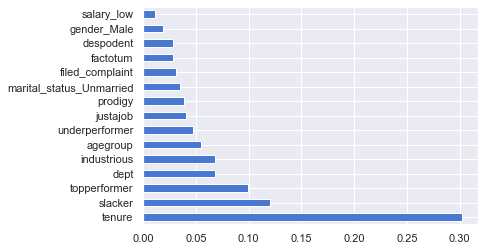

In [245]:
feat_importances = pd.Series(models_fitted_train_data['RF'].best_estimator_.named_steps["randomforestclassifier"].feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

<AxesSubplot:>

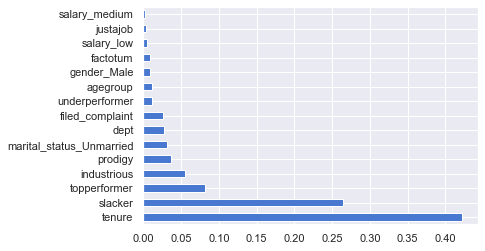

In [246]:
feat_importances = pd.Series(models_fitted_train_data['GB'].best_estimator_.named_steps["gradientboostingclassifier"].feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

### Observation
* From the above analysis, Random forest is giving better accuracy than any other model
* Area under the curve also very close to 1.

In [ ]:
'''

coef = models_fitted_train_data['RF'].feature_importances_
ind = np.argsort(-coef)
for i in range(X_train.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[ind[i]], coef[ind[i]]))
x = range(X_train.shape[1])
y = coef[ind][:X_train.shape[1]]
plt.title("Feature importances")
ax = plt.subplot()
plt.barh(x, y, color='red')
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind])
plt.gca().invert_yaxis()

'''


### Create Model Dump file



In [152]:
import pickle

with open('employee_attrition_final_model_GB.pkl', 'wb') as f:
    pickle.dump(models_fitted_train_data['GB'].best_estimator_, f)
    print('Model dummp created successfully')

Model dummp created successfully


In [153]:
models_fitted_train_data['GB'].best_estimator_

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=5,
                                            n_estimators=200,
                                            random_state=111))])

In [158]:
models_fitted_train_data['GB'].best_params_

{'gradientboostingclassifier__learning_rate': 0.2,
 'gradientboostingclassifier__max_depth': 5,
 'gradientboostingclassifier__n_estimators': 200}

In [154]:
rf_model = models_fitted_train_data['RF'].best_estimator_.named_steps["randomforestclassifier"]

In [155]:
gb_model = models_fitted_train_data['GB'].best_estimator_.named_steps["gradientboostingclassifier"]

In [156]:
X.head()

filed_complaint  recently_promoted  tenure  last_evaluation_missing  \
0  0.0              0.0                4.0     0                         
1  0.0              0.0                3.0     0                         
2  1.0              0.0                3.0     0                         
3  0.0              0.0                4.0     0                         
4  0.0              0.0                3.0     0                         

   underperformer  despodent  prodigy  topperformer  slacker  factotum  \
0  0               1          0        1             0        0          
1  1               0          0        0             1        0          
2  1               0          0        0             1        0          
3  0               1          0        1             0        0          
4  1               0          0        0             1        0          

   justajob  industrious  dept  agegroup  salary_low  salary_medium  \
0  0         1            6     4         0           1               
1  1         0            6     0         1           0               
2  1         0            10    0         0           1               
3  0         1            9     6         1           0               
4  1         0            10    0         0           1               

   gender_Male  marital_status_Unmarried  
0  0            0                         
1  0            1                         
2  0            1                         
3  0            0                         
4  0            1

<a id=predictingunseendata></a> 
## 9. Predicting Unseen Data

In [310]:
unseenData = pd.read_csv('https://docs.google.com/spreadsheets/d/1QNeMmV0PiNoCMSivz7ScZ8NCAOUWP_ThmUNikEMFNIY/export?gid=1947002331&format=csv') # if needed index_col=0
unseenData.to_csv('unseenData.csv')
unseenData.head(5)

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  134              D00-IT    NaN               0.528841         2            
1  221              D00-PD    NaN               0.784561         2            
2  156              D00-SS    NaN               0.545183         2            
3  133              D00-PR    NaN              NaN               4            
4  135              D00-SS    NaN               0.454637         2            

   recently_promoted  salary  satisfaction  tenure  employee_id  
0 NaN                 low     0.400464      3.0     119045       
1 NaN                 low     0.759513      3.0     112223       
2 NaN                 medium  0.336457      3.0     103924       
3 NaN                 medium  0.832039      2.0     105922       
4 NaN                 low     0.320723      5.0     103297

In [311]:
print(unseenData['department'].unique())

['D00-IT' 'D00-PD' 'D00-SS' 'D00-PR' 'D00-FN' 'D00-MT' 'D00-MN' 'D00-ENG'
 'D00-SP' 'D00-TP' nan '-IT' 'D00-AD']


In [312]:
unseenData['department'].replace({'-IT': 'D00-IT'}, inplace=True)
unseenData['department'].fillna('D00-OTH', inplace=True)

In [313]:
unseenData.isnull().sum()[unseenData.isnull().sum() !=0]

filed_complaint      85
last_evaluation      17
recently_promoted    97
satisfaction         3 
tenure               3 
dtype: int64

<AxesSubplot:xlabel='missing_count_percentage', ylabel='features'>

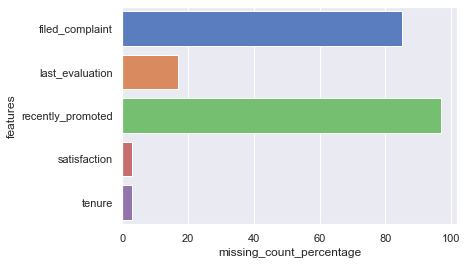

In [314]:
missing_data = unseenData.isnull().sum()[unseenData.isnull().sum() !=0]
missing_data = pd.DataFrame(missing_data.reset_index())
missing_data.rename(columns={'index':'features',0:'missing_count'}, inplace = True)
missing_data['missing_count_percentage'] = ((missing_data['missing_count'])/unseenData.shape[0])*100
plt.figure()
sns.barplot(y = missing_data['features'], x = missing_data['missing_count_percentage'])

In [318]:
df_Pred_UnseenData = pd.merge(unseenData, df_emp_det, how='left', on="employee_id")
df_Pred_UnseenData.head(2)

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  134              D00-IT    NaN               0.528841         2            
1  221              D00-PD    NaN               0.784561         2            

   recently_promoted salary  satisfaction  tenure  employee_id  age gender  \
0 NaN                 low    0.400464      3.0     119045       27   Male    
1 NaN                 low    0.759513      3.0     112223       23   Male    

  marital_status  
0  Unmarried      
1  Unmarried

In [319]:
df_unseen_copy = df_Pred_UnseenData.copy()
df_unseen_copy.head(2)

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0  134              D00-IT    NaN               0.528841         2            
1  221              D00-PD    NaN               0.784561         2            

   recently_promoted salary  satisfaction  tenure  employee_id  age gender  \
0 NaN                 low    0.400464      3.0     119045       27   Male    
1 NaN                 low    0.759513      3.0     112223       23   Male    

  marital_status  
0  Unmarried      
1  Unmarried

In [264]:
df_Pred_UnseenData.isnull().sum()[df_Pred_UnseenData.isnull().sum() !=0]

filed_complaint      85
last_evaluation      17
recently_promoted    97
satisfaction         3 
tenure               3 
dtype: int64

In [265]:
# Cleanse Data
# Replacing null with 0

df_Pred_UnseenData.last_evaluation.fillna(0, inplace=True)
df_Pred_UnseenData.filed_complaint.fillna(0, inplace=True)
df_Pred_UnseenData.recently_promoted.fillna(0, inplace=True)



In [267]:
df_Pred_UnseenData.isnull().sum()[df_Pred_UnseenData.isnull().sum() !=0]

satisfaction    3
tenure          3
dtype: int64

<AxesSubplot:xlabel='last_evaluation'>

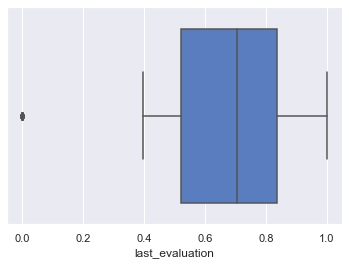

In [271]:
sns.boxplot(df_Pred_UnseenData['last_evaluation'])

In [273]:
# fill null values with mean
df_Pred_UnseenData['satisfaction'].fillna(df_Pred_UnseenData['satisfaction'].mean(),inplace=True)

<AxesSubplot:xlabel='tenure'>

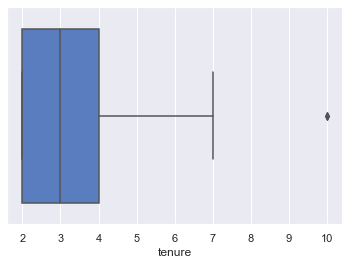

In [272]:
sns.boxplot(df_Pred_UnseenData['tenure'])

In [274]:
# tenure is skewed towards left so fill null values with median

df_Pred_UnseenData['tenure'].fillna(df_Pred_UnseenData['tenure'].median(),inplace=True)

In [275]:
df_Pred_UnseenData.isnull().sum()[df_Pred_UnseenData.isnull().sum() !=0]

Series([], dtype: int64)

In [276]:
# Creating age group column
df_Pred_UnseenData["age_group"] = df_Pred_UnseenData.apply(classify_age, axis=1)

In [278]:
df_Pred_UnseenData['dept'] = le.fit_transform(df_Pred_UnseenData['department'])
df_Pred_UnseenData['agegroup'] = le.fit_transform(df_Pred_UnseenData['age_group'])
df_Pred_UnseenData = pd.get_dummies(df_Pred_UnseenData, prefix=encoding_col_OHE, columns=encoding_col_OHE, drop_first=True )

In [281]:
# remove unused features
df_Pred_UnseenData.drop(['department','age_group','employee_id','age'], axis=1, inplace=True)

In [283]:
df_Pred_UnseenData.shape

(100, 13)

In [284]:
df_Pred_UnseenData.head()

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0  134              0.0              0.528841         2            
1  221              0.0              0.784561         2            
2  156              0.0              0.545183         2            
3  133              0.0              0.000000         4            
4  135              0.0              0.454637         2            

   recently_promoted  satisfaction  tenure  dept  agegroup  salary_low  \
0  0.0                0.400464      3.0     3     1         1            
1  0.0                0.759513      3.0     7     0         1            
2  0.0                0.336457      3.0     10    1         0            
3  0.0                0.832039      2.0     8     6         0            
4  0.0                0.320723      5.0     10    1         1            

   salary_medium  gender_Male  marital_status_Unmarried  
0  0              1            1                         
1  0              1            1                         
2  1              1            1                         
3  1              1            0                         
4  0              1            1

In [285]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'20-25': 0, '26-30': 1, '31-35': 2, '36-40': 3, '41-45': 4, '46-50': 5, '51-55': 6, '56-60': 7}


In [288]:
df_Pred_UnseenData['last_evaluation_missing']= df_Pred_UnseenData.last_evaluation.isnull().astype(int)

In [289]:
addFeaturesBasedOnClusters(df_Pred_UnseenData)

In [291]:
df_Pred_UnseenData.shape

(100, 22)

In [292]:
X_train.shape

(16141, 18)

In [295]:
set(df_Pred_UnseenData.columns) - set(X_train.columns)

[{'avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction'}]

In [296]:
df_Pred_UnseenData.drop(['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction'], axis=1, inplace=True)

In [297]:
df_Pred_UnseenData.shape

(100, 18)

In [303]:
rf_pred_output = rf_model.predict(df_Pred_UnseenData)
rf_pred_prob_output = rf_model.predict_proba(df_Pred_UnseenData)
rf_predictions = rf_pred_prob_output[:,1]

y_pred = pd.DataFrame(rf_pred_output, columns=['status'])
y_pred_proba = pd.DataFrame(rf_predictions, columns=['Probability to Leave'])

In [304]:
y_pred.status.value_counts()

Employed    95
Left        5 
Name: status, dtype: int64

In [306]:
y_pred_df =  pd.concat([y_pred,y_pred_proba], axis=1)
y_pred_df

status  Probability to Leave
0   Employed  0.266189            
1   Employed  0.070000            
2   Employed  0.399022            
3   Employed  0.195000            
4   Employed  0.215833            
..       ...       ...            
95  Employed  0.057500            
96  Employed  0.090000            
97  Employed  0.071667            
98  Employed  0.329042            
99  Employed  0.153750            

[100 rows x 2 columns]

In [307]:
gb_pred_output = gb_model.predict(df_Pred_UnseenData)
gb_pred_prob_output = gb_model.predict_proba(df_Pred_UnseenData)
gb_predictions = gb_pred_prob_output[:,1]

y_pred_gb = pd.DataFrame(gb_pred_output, columns=['status'])
y_pred_proba_gb = pd.DataFrame(gb_predictions, columns=['Probability to Leave'])

In [308]:
y_pred_gb.status.value_counts()

Employed    93
Left        7 
Name: status, dtype: int64

In [327]:
y_pred_df[y_pred_df.status == 'Left']['Probability to Leave'].min()

0.5447122252747253

In [329]:
y_pred_df = pd.concat([ df_unseen_copy[['employee_id']], y_pred_df], axis=1)

In [330]:
y_pred_df

employee_id    status  Probability to Leave
0   119045       Employed  0.266189            
1   112223       Employed  0.070000            
2   103924       Employed  0.399022            
3   105922       Employed  0.195000            
4   103297       Employed  0.215833            
..     ...            ...       ...            
95  116666       Employed  0.057500            
96  106422       Employed  0.090000            
97  107889       Employed  0.071667            
98  117622       Employed  0.329042            
99  108058       Employed  0.153750            

[100 rows x 3 columns]

### Export final prediction to csv file



In [331]:
y_pred_df.to_csv('1007_HR_Employee_Attrition_Prediction.csv', header=True, index=False)

<a id=conclusion></a> 
## 10. Conclusion

This [csv file](./1007_HR_Employee_Attrition_Prediction.csv) is having prediction of employee attrition possibility. It will be published to HR team to further action. Most influencing factors of employee attrition are:
    
        * More workload (number of working hours, number projects involved)
        * Satisfaction
        * Tenure of the employee
        
    HR has to consider these factors to negotiate with employees to retain them

### Selected Random Forest model is used for prediction due to following metrics 



| Threshold | F1 | Precision | Recall | AUC | Accuracy |
| --------- |--------- |--------- | --------- | --------- | --------- |
|(at best F1 Score)  0.515|0.945 | 0.939 |0.952 | 0.982 | 0.945| 
|0.5|0.944 |0.936 | 0.954 | 0.982 | 0.944| 
|0.7|0.943 |0.957 | 0.924 | 0.982 | 0.942 |